# MCMC

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from mcmc import *
from mcmc_plots import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
FONTSIZE=16
LABELSIZE=0.9*FONTSIZE
LINEWIDTH=2.0
FIGWIDTH=8
ASPECT_RATIO=4/3

plt.rcParams['axes.labelsize'] = FONTSIZE
plt.rcParams['axes.linewidth'] = LINEWIDTH
plt.rcParams['axes.titlesize'] = 1.1*FONTSIZE
plt.rcParams['figure.figsize'] = [FIGWIDTH, FIGWIDTH/ASPECT_RATIO]
plt.rcParams['figure.labelsize'] = FONTSIZE
plt.rcParams['figure.titlesize'] = 1.1*FONTSIZE
plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.framealpha'] = 1.0
plt.rcParams['legend.fontsize'] = LABELSIZE
plt.rcParams['legend.title_fontsize'] = LABELSIZE
plt.rcParams['patch.linewidth'] = LINEWIDTH
plt.rcParams['lines.linewidth'] = LINEWIDTH
plt.rcParams['xtick.labelsize'] = LABELSIZE
plt.rcParams['ytick.labelsize'] = LABELSIZE
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['figure.autolayout'] = True

plt.rcParams['patch.edgecolor'] = 'black'

In [5]:
DATA_PATH = "../GRBs/GRB_data.txt"
arr = np.loadtxt(DATA_PATH, skiprows=1)

In [10]:
logT90 = arr[:,0]
sigma_logT90 = arr[:,1]

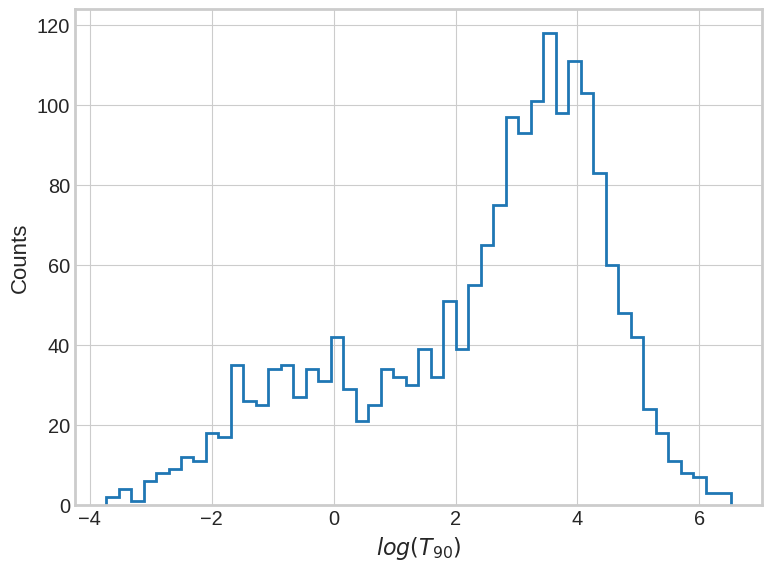

In [37]:
plt.hist(logT90, bins=50, histtype='step')#, color='k')
plt.xlabel('$log(T_{90})$')
plt.ylabel('Counts')
plt.show()

## Generated Data - sigma_logT90 = 0

In [40]:
LOAD = 1
outdir = '../figure/generated_data'

rng = np.random.default_rng(1234)

logT90       = arr[:,0]
sigma_logT90 = arr[:,1]

theta_true = {"w": 0.3, "mu1": -0.5, "mu2": 3.5, "sigma1": 0.8, "sigma2": 1.0}
logT90 = generate_data(theta_true, N = len(logT90), rng=rng, sigma_logT90=sigma_logT90)

theta_sim = np.array((theta_true['w'], 
                    theta_true['mu1'], 
                    theta_true['mu2']-theta_true['mu1'], 
                    np.log(theta_true['sigma1']),
                    np.log(theta_true['sigma2']))) 

print('logL (simulation)= ', log_likelihood(logT90, theta_sim, sigma_logT90))

# define the prior bounds
bounds = [
    [0.0, 1.0],     # w
    [-4, 7],        # mu1 (ln s)
    [0.0, 10.0],    # delta = mu2 - mu1
    [np.log(0.1), np.log(6.0)],    # ln(sigma1) 
    [np.log(0.1), np.log(6.0)]     # ln(sigma2)
]

# run the mh sampler
n_steps  = 50000

covariance = np.array(
    ([ 1.10699367e-04,  7.98001466e-05, -1.65689048e-05,  4.40845573e-05, -4.28138283e-05],
     [ 7.98001466e-05,  1.14011773e-03, -8.92977095e-04,  3.62863563e-04, -1.44984942e-04],
     [-1.65689048e-05, -8.92977095e-04,  1.48099232e-03, -6.08273098e-05, -3.02914339e-05],
     [ 4.40845573e-05,  3.62863563e-04, -6.08273098e-05,  1.41933661e-03, -2.51210812e-04],
     [-4.28138283e-05, -1.44984942e-04, -3.02914339e-05, -2.51210812e-04, 5.78657424e-04]))

""" sigma in spazio lineare
covariance = np.array(
    ([ 1.16001274e-04, 4.34444634e-05, -8.75870281e-06, 3.74859215e-05, -2.68890398e-05],
     [ 4.34444634e-05, 1.30336403e-03, -1.12672730e-03, 2.51966524e-04, -1.73614797e-04],
     [-8.75870281e-06, -1.12672730e-03, 1.90314140e-03, -9.62649007e-05, 8.67849825e-06],
     [ 3.74859215e-05, 2.51966524e-04, -9.62649007e-05, 8.14646898e-04, -1.35645581e-04],
     [-2.68890398e-05, -1.73614797e-04, 8.67849825e-06, -1.35645581e-04, 5.28118669e-04]))
"""
if LOAD == 0:
    """ parametri iniziali random
    theta0 = np.array((rng.uniform(bounds[0][0],bounds[0][1]),
                       rng.uniform(bounds[1][0],bounds[1][1]),
                       rng.uniform(bounds[2][0],bounds[2][1]),
                       rng.uniform(bounds[3][0],bounds[3][1]),
                       rng.uniform(bounds[4][0],bounds[4][1])))
    """
    theta0  = init_theta_from_data(logT90, bounds)
    samples = metropolis_hastings(theta0, logT90, bounds, init_cov=covariance, 
                                  rng = rng, sigma_logT90 = 0.0, n = n_steps)
    np.savetxt('../chains/chain.txt',samples)
else:
    samples = np.loadtxt('../chains/chain.txt')

logL (simulation)=  -3730.0687128964673


__Before adaptive__: Acceptance rate = 0.0044

__After adaptive__: Acceptance rate = 0.3184

Saved: figure/trace_plot_mcmc_cov.png (PNG 300 dpi) and figure/trace_plot_mcmc_cov.pdf (PDF)


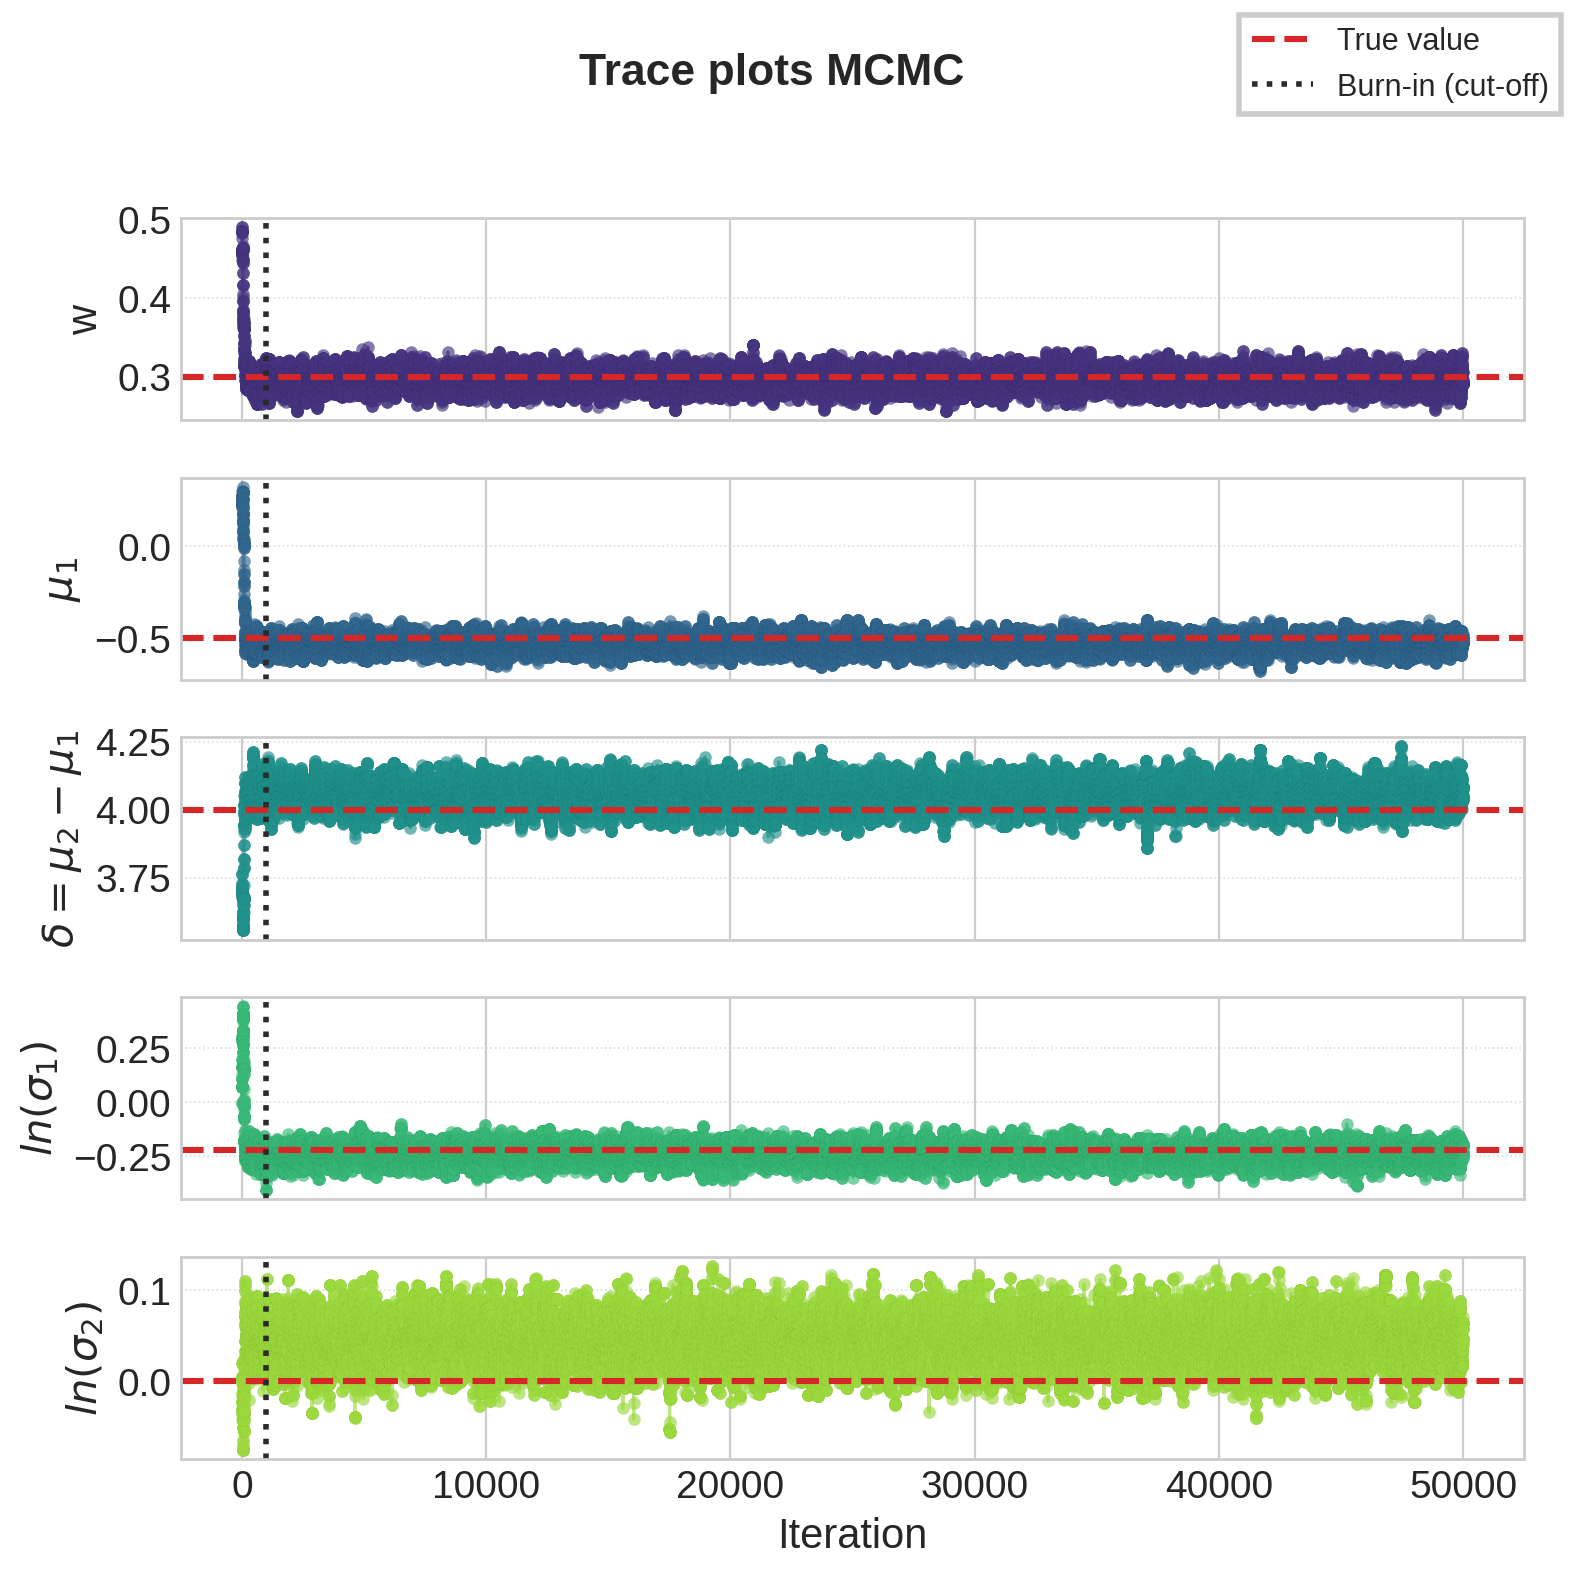

In [24]:
filename = 'trace_plot_mcmc_cov'
fig, axes = plot_trace_mcmc(samples, filename, theta_sim, burnin=1000, outdir=outdir)

In [41]:
# burnin = 1000 #per valori simulati
burnin = 1000

samples_new = samples[burnin:,:]

In [26]:
cov_est = np.cov(samples_new, rowvar=False)
print('covarianza =\n', cov_est)

covarianza =
 [[ 1.15815367e-04  5.48447232e-05 -1.43296581e-05  5.80929553e-05
  -3.72657523e-05]
 [ 5.48447232e-05  1.35734254e-03 -1.16602072e-03  3.33962086e-04
  -1.71366892e-04]
 [-1.43296581e-05 -1.16602072e-03  1.92682068e-03 -1.25752292e-04
   3.15950982e-05]
 [ 5.80929553e-05  3.33962086e-04 -1.25752292e-04  1.32607001e-03
  -1.93531636e-04]
 [-3.72657523e-05 -1.71366892e-04  3.15950982e-05 -1.93531636e-04
   5.23941993e-04]]


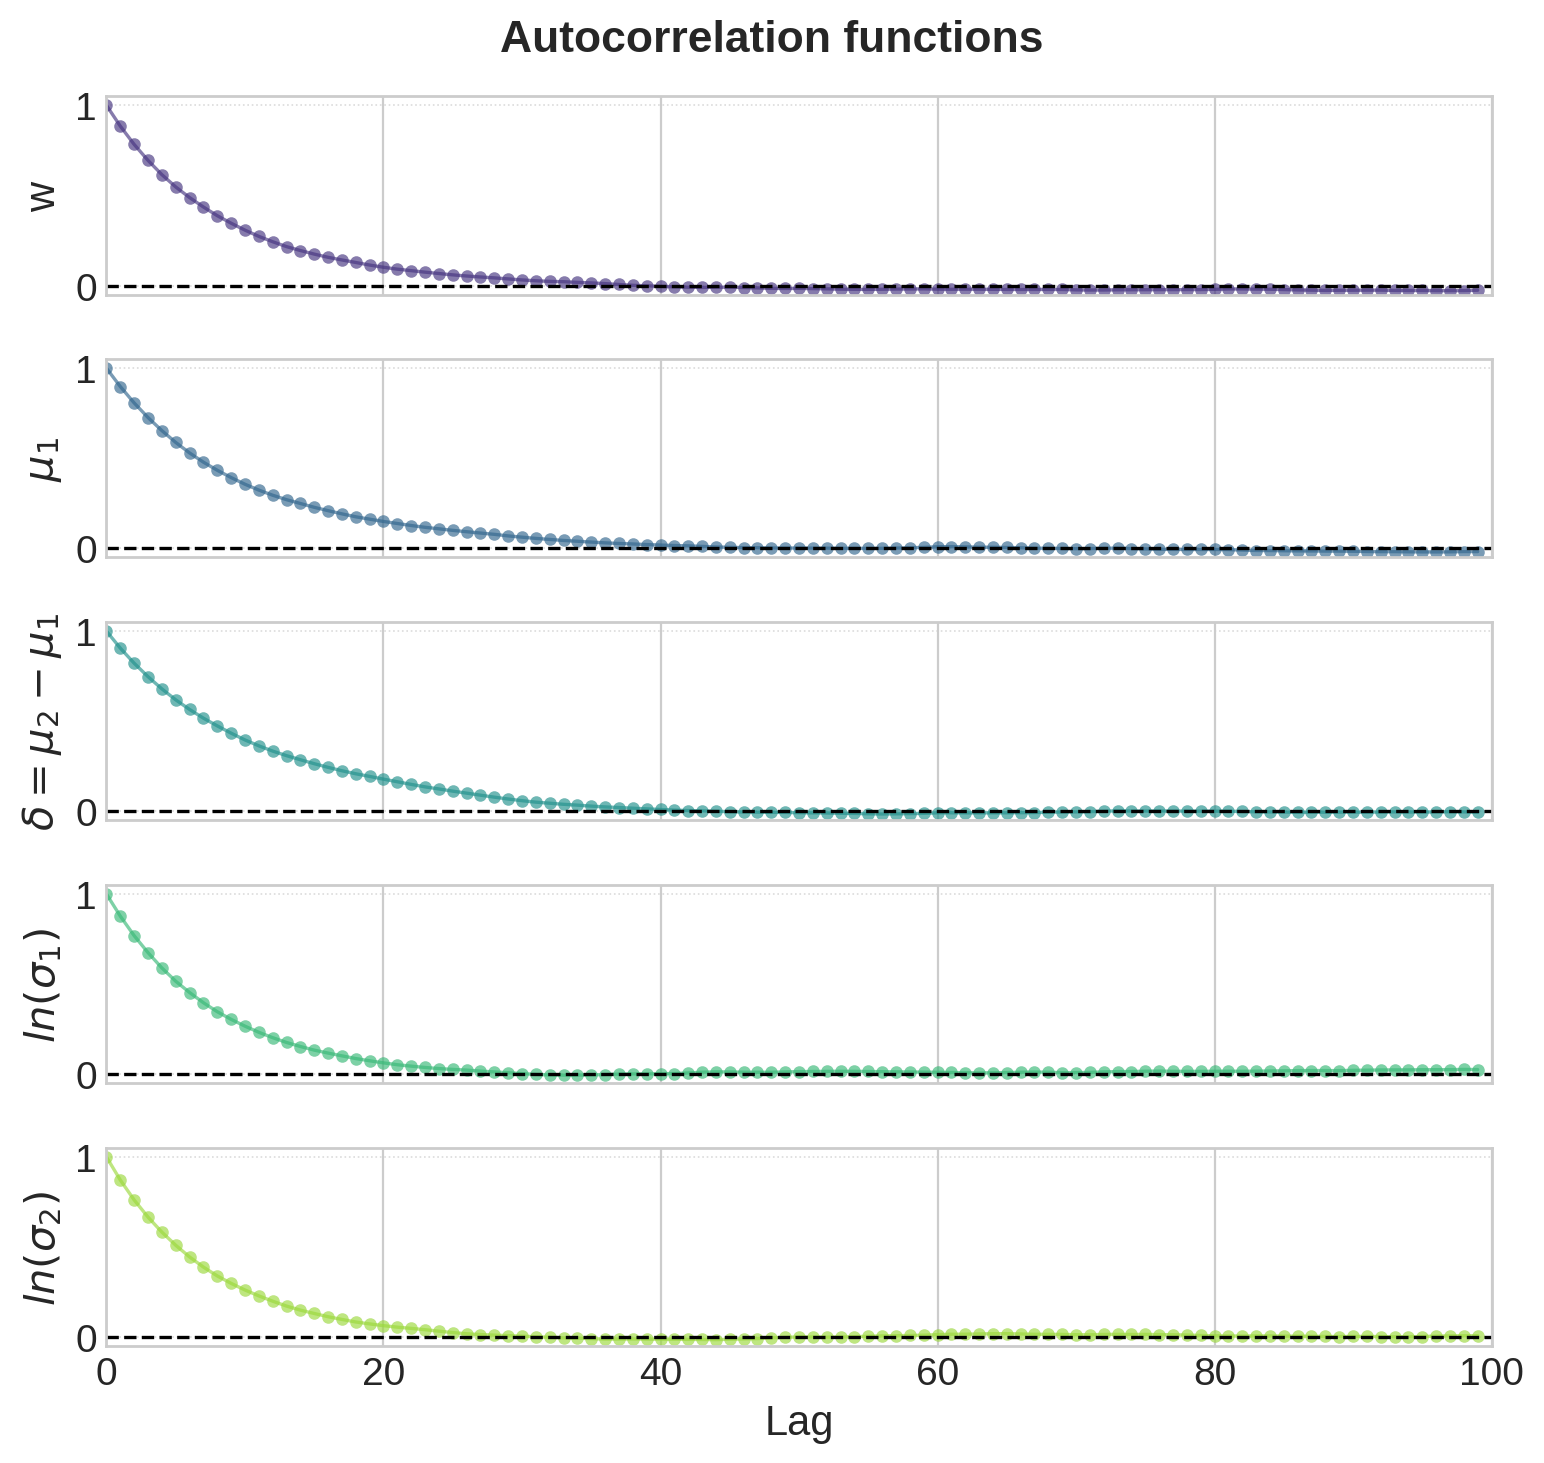

In [28]:
filename = 'autocorrelation_mcmc_cov'
fig3, axes3 = plot_autocorrelations(samples_new, filename, max_lag=100, outdir=outdir)

In [12]:
for i, key in enumerate(theta_true.keys()):
    print(f'N_ESS ({key}) = {ess(samples_new[:,i]):.0f}')

N_ESS (w) = 90
N_ESS (mu1) = 78
N_ESS (mu2) = 91
N_ESS (sigma1) = 75
N_ESS (sigma2) = 81


__Before adaptive__:
   - N_ESS (w) = 132
   - N_ESS (mu1) = 106
   - N_ESS (mu2) = 112
   - N_ESS (sigma1) = 112
   - N_ESS (sigma2) = 112

__After adaptive__:
   - N_ESS (w) = 2787
   - N_ESS (mu1) = 2527
   - N_ESS (mu2) = 2691
   - N_ESS (sigma1) = 2458
   - N_ESS (sigma2) = 2412

In [42]:
#thinning = 1000 #per valori simulati
# 25 cov (valori simulati)
thinning = 25
acf = []
for i in range(5):
    acf.append(autocorrelation(samples_new[:,i], norm=True))
    print(acf[i][thinning])
    
samples_new = samples_new[::thinning,:]

0.05931870341229404
0.10030957912251826
0.11216076581662446
0.0269360029764784
0.025522746545050486


In [30]:
samples_new.shape

(1960, 5)

/home/leo/Desktop/Bayesian_probability/mcmc_plots.py:296: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  samples: np.ndarray
/home/leo/Desktop/Bayesian_probability/mcmc_plots.py:297: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  2D array with shape (n_samples, n_parameters) containing posterior draws.


Saved: figure/marginal_distribution_mcmc_cov.png (PNG 300 dpi) and figure/marginal_distribution_mcmc_cov.pdf (PDF)


/home/leo/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


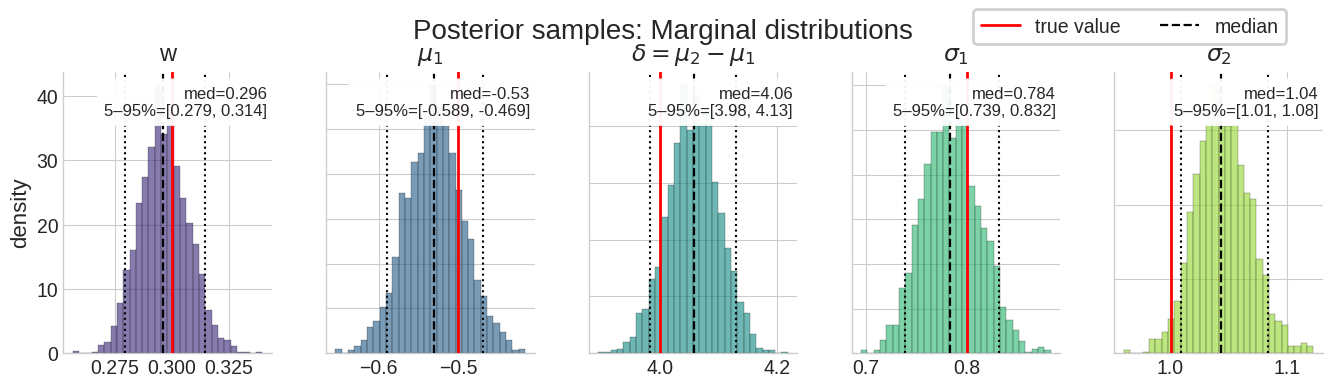

In [31]:
filename = 'marginal_distribution_mcmc_cov'
fig2, axes2 = plot_marginal_distributions(samples_new, filename, theta_sim, outdir=outdir, sigma_scale='linear')

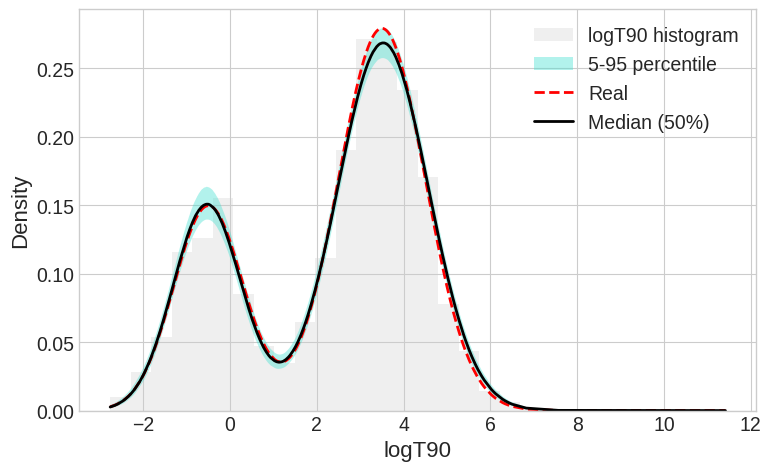

In [32]:
filename = 'distribution_mcmc_cov'
fig4, axes4 = plot_distribution(logT90, samples_new, filename, theta_true=theta_sim, outdir=outdir)
#axes4.set_xlim(0,100)

In [43]:
# trasformazione
sigma1_samples = np.exp(samples_new[:,3])
sigma2_samples = np.exp(samples_new[:,4])

samples_transformed = samples_new.copy()
samples_transformed[:,3] = sigma1_samples
samples_transformed[:,4] = sigma2_samples

In [44]:
lns1, lns2 = samples_new[:,3:].T
w, mu1, delta, s1, s2 = samples_transformed.T
mu2 = mu1 + delta

scale1 = np.exp(mu1)
scale2 = np.exp(mu2)
mean1 = np.exp(mu1 + 0.5 * s1**2)
mean2 = np.exp(mu2 + 0.5 * s2**2)
sd1 = np.sqrt((np.exp(s1**2)-1) * np.exp(2*mu1 + s1**2))
sd2 = np.sqrt((np.exp(s2**2)-1) * np.exp(2*mu2 + s2**2))

def pctls(a):
    p = np.percentile(a, [5,16,50,84,95])
    mean  = np.mean(a)
    sigma = np.std(a, ddof=1)
    # median, +err, -err, +err90, -err90, sigma, mean
    return p[2], p[3]-p[2], p[2]-p[1], p[4]-p[2], p[2]-p[0], sigma, mean  

print("Parametri mcmc:")
for name, param in [('w',w),('mu1',mu1),('delta',delta),('mu2',mu2),
                    ('lns1', lns1),('lns2', lns2),('s1',s1),('s2',s2)]:
    med, up68, down68, up90, down90, sigma, mean = pctls(param)
    print(f"{name}: {med:.3f} +{up68:.3f} -{down68:.3f}  ({mean:.3f}±{sigma:.3f})    [{med-down90:.3f}, {med+up90:.3f}]  (90%)")

print("\nParametri in secondi:")
for name, param in [('median1',scale1),('median2',scale2),('mean1',mean1),('mean2',mean2),('sd1',sd1),('sd2',sd2)]:
    med, up68, down68, up90, down90, sigma, mean = pctls(param)
    print(f"{name}: {med:.3f} +{up68:.3f} -{down68:.3f} s  ({mean:.3f}±{sigma:.3f})   [{med-down90:.3f}, {med+up90:.3f}] s (90%)")

Parametri mcmc:
w: 0.296 +0.011 -0.010  (0.297±0.011)    [0.279, 0.314]  (90%)
mu1: -0.530 +0.037 -0.037  (-0.530±0.037)    [-0.589, -0.469]  (90%)
delta: 4.058 +0.044 -0.044  (4.058±0.044)    [3.983, 4.130]  (90%)
mu2: 3.528 +0.031 -0.032  (3.528±0.032)    [3.476, 3.579]  (90%)
lns1: -0.244 +0.038 -0.036  (-0.243±0.036)    [-0.302, -0.184]  (90%)
lns2: 0.043 +0.024 -0.021  (0.044±0.022)    [0.009, 0.080]  (90%)
s1: 0.784 +0.030 -0.028  (0.785±0.028)    [0.739, 0.832]  (90%)
s2: 1.044 +0.025 -0.022  (1.045±0.023)    [1.009, 1.083]  (90%)

Parametri in secondi:
median1: 0.589 +0.022 -0.021 s  (0.589±0.022)   [0.555, 0.626] s (90%)
median2: 34.069 +1.060 -1.070 s  (34.072±1.077)   [32.337, 35.853] s (90%)
mean1: 0.800 +0.041 -0.037 s  (0.802±0.038)   [0.743, 0.869] s (90%)
mean2: 58.754 +2.211 -1.992 s  (58.832±2.118)   [55.464, 62.330] s (90%)
sd1: 0.736 +0.069 -0.057 s  (0.742±0.066)   [0.645, 0.857] s (90%)
sd2: 82.538 +5.611 -4.796 s  (82.873±5.272)   [74.928, 91.979] s (90%)


## Real Data - sigma_logT90 = 0

In [34]:
LOAD = 1
outdir = '../figure/real_data'

rng = np.random.default_rng(1234)

logT90       = arr[:,0]
sigma_logT90 = arr[:,1]


# define the prior bounds
bounds = [
    [0.0, 1.0],     # w
    [-4, 7],        # mu1 (ln s)
    [0.0, 10.0],    # delta = mu2 - mu1
    [np.log(0.1), np.log(6.0)],    # ln(sigma1) 
    [np.log(0.1), np.log(6.0)]     # ln(sigma2)
]

# run the mh sampler
n_steps  = 50000

covariance = np.array(
    ([ 0.00036691,  0.00168623, -0.00117116,  0.00076398, -0.00033632],
     [ 0.00168623,  0.01478118, -0.01111397,  0.0049843,  -0.00238093],
     [-0.00117116, -0.01111397,  0.00920665, -0.0035476,   0.00156858],
     [ 0.00076398,  0.0049843,  -0.0035476,   0.00329768, -0.00094723],
     [-0.00033632, -0.00238093,  0.00156858, -0.00094723,  0.00096989]))

if LOAD == 0:
    theta0  = init_theta_from_data(logT90, bounds)
    samples = metropolis_hastings(theta0, logT90, bounds, init_cov=covariance, 
                                  rng = rng, sigma_logT90 = 0.0, n = n_steps)
    np.savetxt('../chains/chain_real.txt',samples)
else:
    samples = np.loadtxt('../chains/chain_real.txt')

Saved: ../figure/real_data/trace_plot_mcmc_real_cov.png (PNG 300 dpi) and ../figure/real_data/trace_plot_mcmc_real_cov.pdf (PDF)


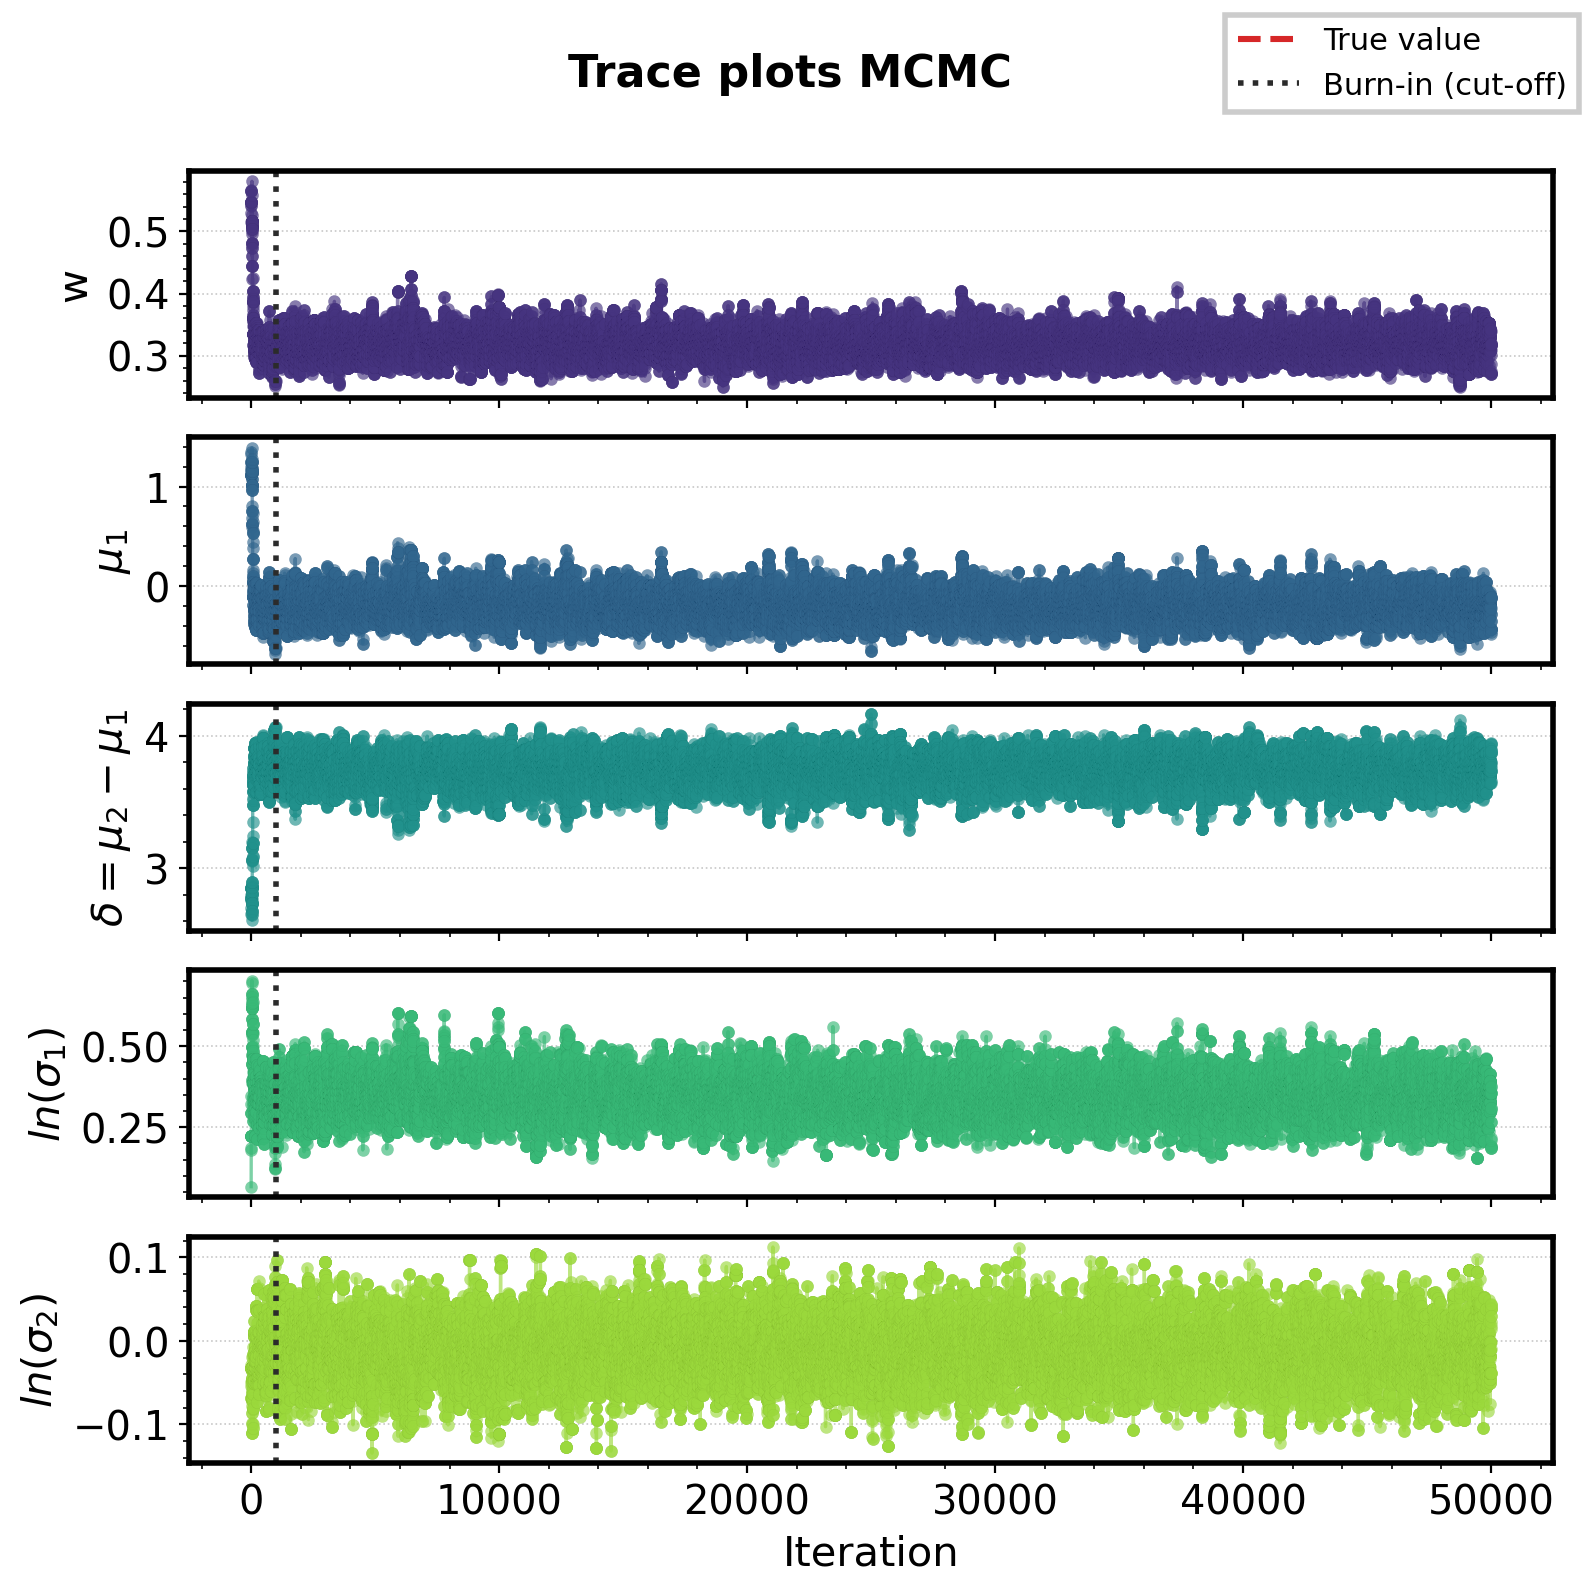

In [16]:
filename = 'trace_plot_mcmc_real_cov'
fig, axes = plot_trace_mcmc(samples, filename, burnin=1000, outdir=outdir)

In [35]:
burnin = 1000

samples_new = samples[burnin:,:]

In [18]:
cov_est = np.cov(samples_new, rowvar=False)
print('covarianza =\n', cov_est)

covarianza =
 [[ 0.00040739  0.00206483 -0.00144761  0.0008572  -0.00042287]
 [ 0.00206483  0.01767953 -0.01350843  0.00606761 -0.00280426]
 [-0.00144761 -0.01350843  0.01140818 -0.00442567  0.001863  ]
 [ 0.0008572   0.00606761 -0.00442567  0.00357725 -0.00106665]
 [-0.00042287 -0.00280426  0.001863   -0.00106665  0.00109259]]


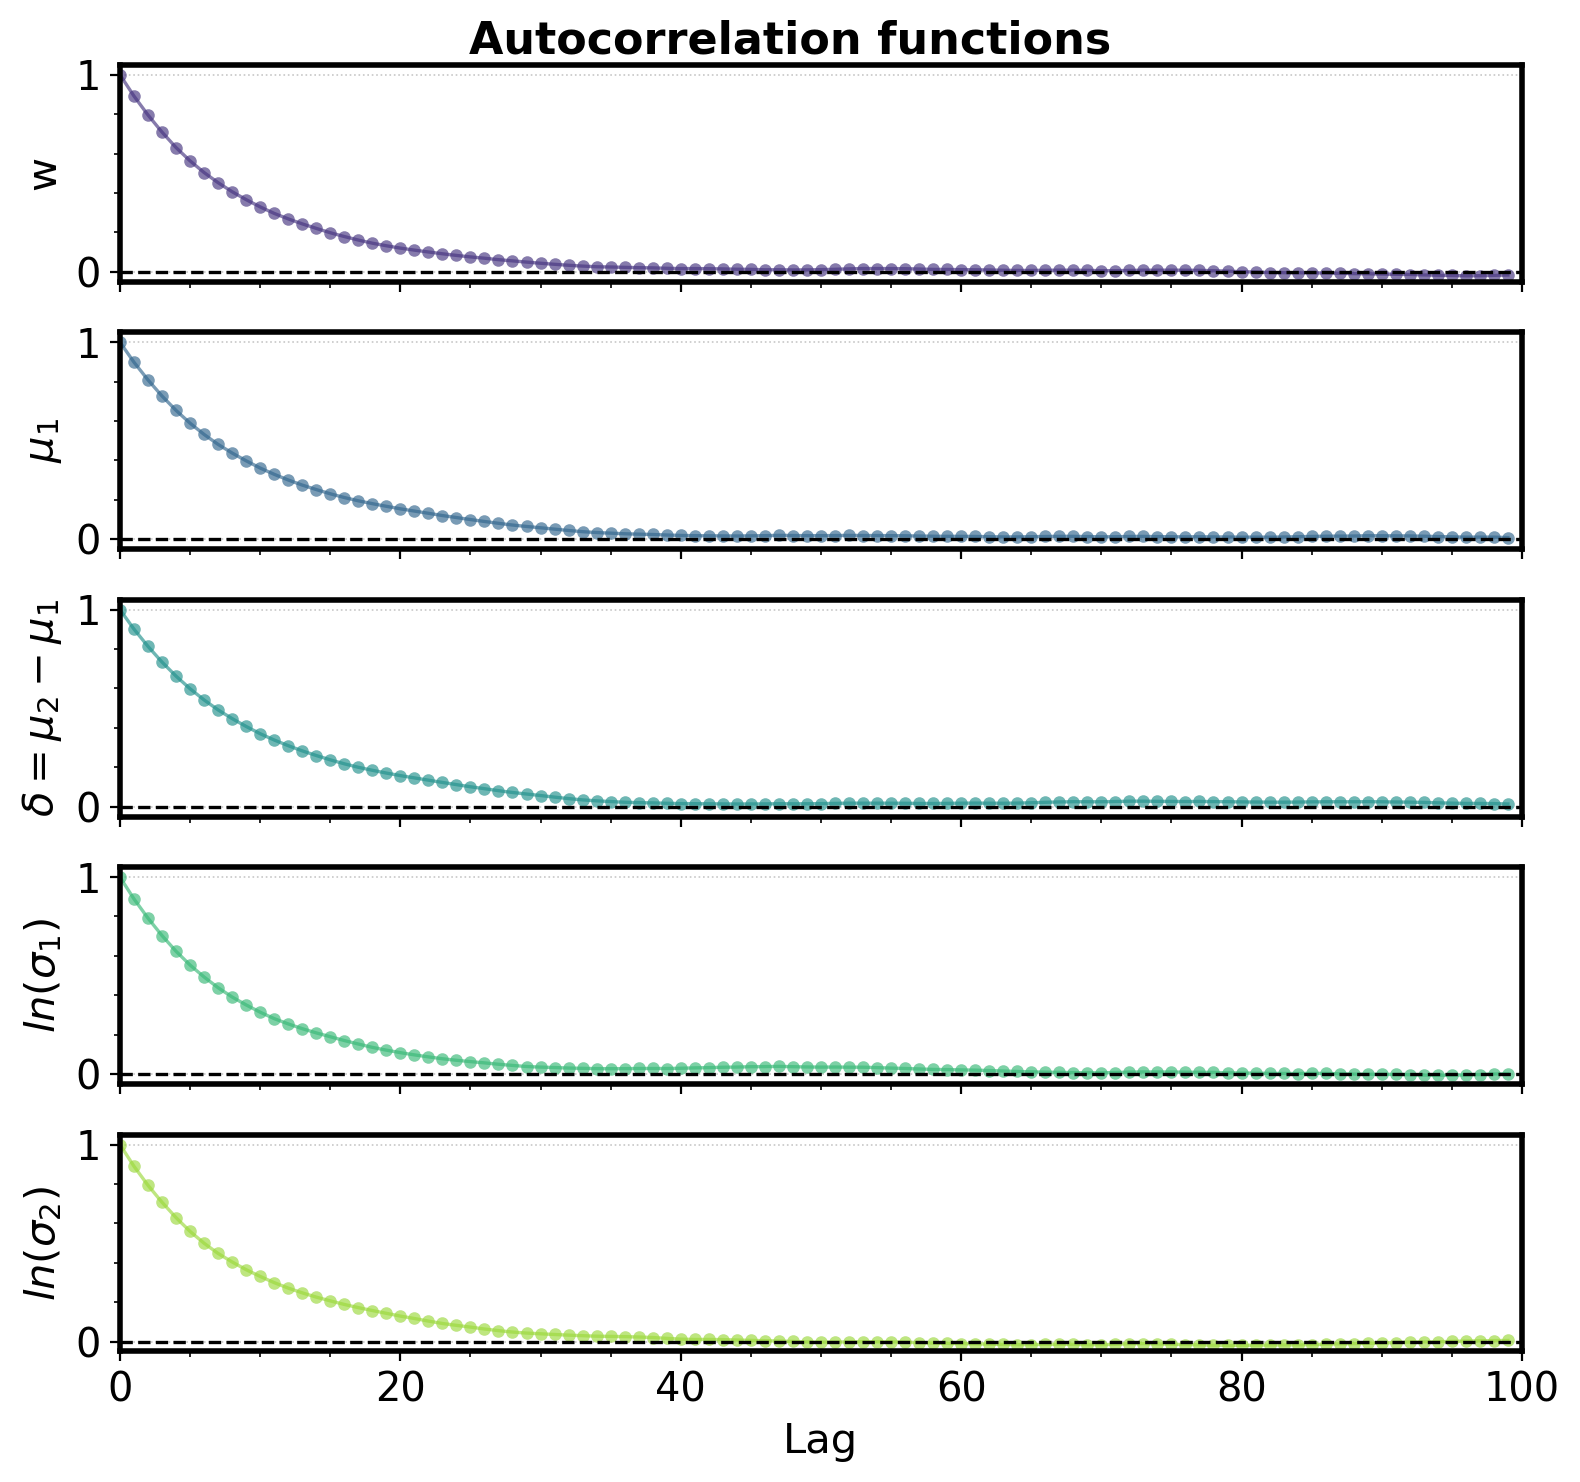

In [19]:
filename = 'autocorrelation_mcmc_real_cov'
fig3, axes3 = plot_autocorrelations(samples_new, filename, max_lag=100, outdir=outdir)

In [36]:
thinning = 25
acf = []
for i in range(5):
    acf.append(autocorrelation(samples_new[:,i], norm=True))
    print(acf[i][thinning])
    
samples_new = samples_new[::thinning,:]

0.07536051989041233
0.09974334095550082
0.10098416742456019
0.06359260168159236
0.07354647042839567


In [22]:
samples_new.shape

(1960, 5)

/home/leo/Desktop/Bayesian_probability/codes/mcmc_plots.py:297: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(png_path, dpi=300, bbox_inches='tight', pad_inches=0.06)
/home/leo/Desktop/Bayesian_probability/codes/mcmc_plots.py:298: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(pdf_path, dpi=300, bbox_inches='tight', pad_inches=0.06)


Saved: ../figure/real_data/marginal_distribution_mcmc_real_cov.png (PNG 300 dpi) and ../figure/real_data/marginal_distribution_mcmc_real_cov.pdf (PDF)


/home/leo/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


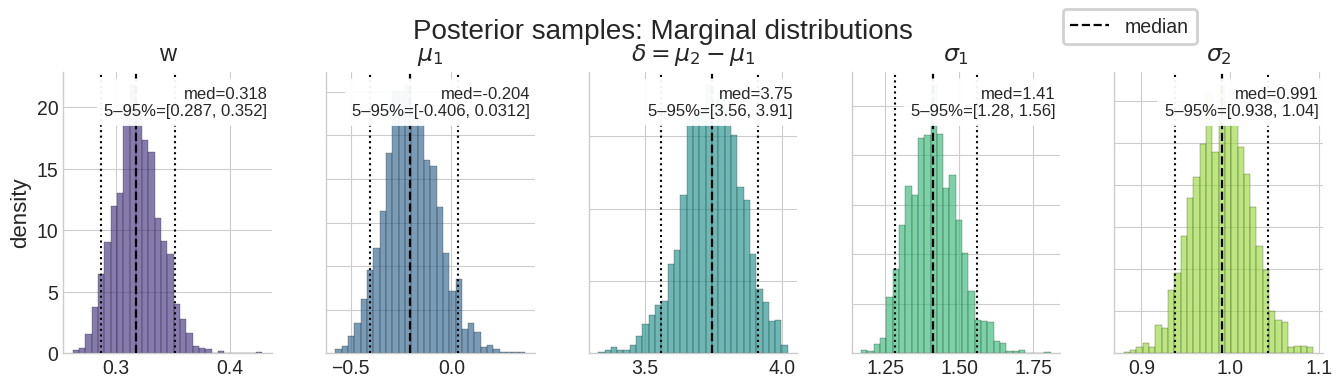

In [23]:
filename = 'marginal_distribution_mcmc_real_cov'
fig2, axes2 = plot_marginal_distributions(samples_new, filename, outdir=outdir, sigma_scale='linear')

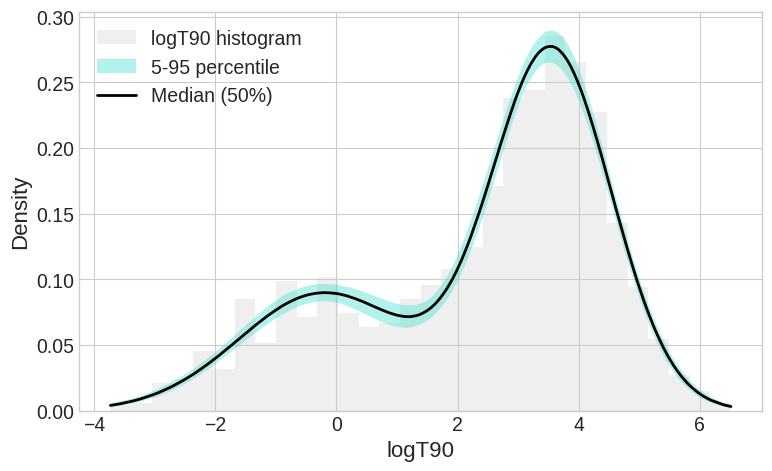

In [24]:
filename = 'distribution_mcmc_real_cov'
fig4, axes4 = plot_distribution(logT90, samples_new, filename, outdir=outdir)

In [37]:
# trasformazione
sigma1_samples = np.exp(samples_new[:,3])
sigma2_samples = np.exp(samples_new[:,4])

samples_transformed = samples_new.copy()
samples_transformed[:,3] = sigma1_samples
samples_transformed[:,4] = sigma2_samples

In [39]:
lns1, lns2 = samples_new[:,3:].T
w, mu1, delta, s1, s2 = samples_transformed.T
mu2 = mu1 + delta

scale1 = np.exp(mu1)
scale2 = np.exp(mu2)
mean1 = np.exp(mu1 + 0.5 * s1**2)
mean2 = np.exp(mu2 + 0.5 * s2**2)
sd1 = np.sqrt((np.exp(s1**2)-1) * np.exp(2*mu1 + s1**2))
sd2 = np.sqrt((np.exp(s2**2)-1) * np.exp(2*mu2 + s2**2))

def pctls(a):
    p = np.percentile(a, [5,16,50,84,95])
    mean  = np.mean(a)
    sigma = np.std(a, ddof=1)
    # median, +err, -err, +err90, -err90, sigma, mean
    return p[2], p[3]-p[2], p[2]-p[1], p[4]-p[2], p[2]-p[0], sigma, mean  

print("Parametri mcmc:")
for name, param in [('w',w),('mu1',mu1),('delta',delta),('mu2',mu2),
                    ('lns1', lns1),('lns2', lns2),('s1',s1),('s2',s2)]:
    med, up68, down68, up90, down90, sigma, mean = pctls(param)
    print(f"{name}: {med:.3f} +{up68:.3f} -{down68:.3f}  ({mean:.3f}±{sigma:.3f})    [{med-down90:.3f}, {med+up90:.3f}]  (90%)")

print("\nParametri in secondi:")
for name, param in [('median1',scale1),('median2',scale2),('mean1',mean1),('mean2',mean2),('sd1',sd1),('sd2',sd2)]:
    med, up68, down68, up90, down90, sigma, mean = pctls(param)
    print(f"{name}: {med:.3f} +{up68:.3f} -{down68:.3f} s  ({mean:.3f}±{sigma:.3f})   [{med-down90:.3f}, {med+up90:.3f}] s (90%)")

Parametri mcmc:
w: 0.318 +0.021 -0.019  (0.319±0.020)    [0.287, 0.352]  (90%)
mu1: -0.204 +0.137 -0.120  (-0.197±0.133)    [-0.406, 0.031]  (90%)
delta: 3.746 +0.103 -0.102  (3.744±0.107)    [3.559, 3.914]  (90%)
mu2: 3.547 +0.043 -0.046  (3.547±0.045)    [3.473, 3.618]  (90%)
lns1: 0.344 +0.060 -0.062  (0.344±0.060)    [0.248, 0.444]  (90%)
lns2: -0.009 +0.032 -0.034  (-0.010±0.033)    [-0.064, 0.042]  (90%)
s1: 1.410 +0.087 -0.085  (1.413±0.085)    [1.281, 1.559]  (90%)
s2: 0.991 +0.032 -0.033  (0.990±0.033)    [0.938, 1.043]  (90%)

Parametri in secondi:
median1: 0.815 +0.120 -0.092 s  (0.829±0.113)   [0.666, 1.032] s (90%)
median2: 34.726 +1.514 -1.564 s  (34.740±1.562)   [32.221, 37.250] s (90%)
mean1: 2.200 +0.610 -0.428 s  (2.304±0.595)   [1.552, 3.424] s (90%)
mean2: 56.662 +2.060 -1.904 s  (56.737±2.023)   [53.399, 60.146] s (90%)
sd1: 5.527 +2.574 -1.638 s  (6.085±2.620)   [3.243, 10.831] s (90%)
sd2: 73.044 +5.114 -4.492 s  (73.347±4.876)   [65.876, 81.695] s (90%)


## Generated data - sigma_logT90

In [51]:
LOAD = 0
outdir = '../figure/generated_data_sigmaT90'

rng = np.random.default_rng(1234)

logT90       = arr[:,0]
sigma_logT90 = arr[:,1]

theta_true = {"w": 0.3, "mu1": -0.5, "mu2": 3.5, "sigma1": 0.8, "sigma2": 1.0}
logT90 = generate_data(theta_true, N = len(logT90), rng=rng, sigma_logT90=sigma_logT90)

theta_sim = np.array((theta_true['w'], 
                    theta_true['mu1'], 
                    theta_true['mu2']-theta_true['mu1'], 
                    np.log(theta_true['sigma1']),
                    np.log(theta_true['sigma2']))) 

print('logL (simulation)= ', log_likelihood(logT90, theta_sim, sigma_logT90))

# define the prior bounds
bounds = [
    [0.0, 1.0],     # w
    [-4, 7],        # mu1 (ln s)
    [0.0, 10.0],    # delta = mu2 - mu1
    [np.log(0.1), np.log(6.0)],    # ln(sigma1) 
    [np.log(0.1), np.log(6.0)]     # ln(sigma2)
]

# run the mh sampler
n_steps  = 50000

covariance = np.array(
    ([ 1.10708276e-04,  7.97741880e-05, -2.33747287e-05, 9.86071213e-05, -3.91979968e-05],
     [ 7.97741880e-05,  1.42655389e-03, -1.42119019e-03, 3.91531024e-04, -8.11795018e-05],
     [-2.33747287e-05, -1.42119019e-03,  2.26793411e-03, -3.43462767e-04, 3.74484512e-05],
     [ 9.86071213e-05,  3.91531024e-04, -3.43462767e-04, 1.79939088e-03, -1.88013038e-04],
     [-3.91979968e-05, -8.11795018e-05,  3.74484512e-05, -1.88013038e-04, 4.97605690e-04]))

if LOAD == 0:
    theta0  = init_theta_from_data(logT90, bounds)
    samples = metropolis_hastings(theta0, logT90, bounds, init_cov=covariance, 
                                  rng = rng, sigma_logT90 = sigma_logT90, n = n_steps)
    np.savetxt('../chains/chain_sigmaT90.txt',samples)
else:
    samples = np.loadtxt('../chains/chain_sigmaT90.txt')

logL (simulation)=  -3730.0687128964673
iteration 0: acceptance 1.0
iteration 2500: acceptance 0.3202718912435026
iteration 5000: acceptance 0.3313337332533493
iteration 7500: acceptance 0.31795760565257963
iteration 10000: acceptance 0.31816818318168183
iteration 12500: acceptance 0.31837453003759697
iteration 15000: acceptance 0.3154456369575362
iteration 17500: acceptance 0.3136392206159648
iteration 20000: acceptance 0.31248437578121097
iteration 22500: acceptance 0.3105639749344474
iteration 25000: acceptance 0.3091476340946362
iteration 27500: acceptance 0.30951601759936004
iteration 30000: acceptance 0.31092296923435886
iteration 32500: acceptance 0.3105750592289468
iteration 35000: acceptance 0.31147681494814433
iteration 37500: acceptance 0.310151729287219
iteration 40000: acceptance 0.3101422464438389
iteration 42500: acceptance 0.3099927060539752
iteration 45000: acceptance 0.3087709162018622
iteration 47500: acceptance 0.30961453443085407
Metropolis finished. Acceptance rat

Saved: ../figure/generated_data_sigmaT90/trace_plot_mcmc_sigmaT90_cov.png (PNG 300 dpi) and ../figure/generated_data_sigmaT90/trace_plot_mcmc_sigmaT90_cov.pdf (PDF)


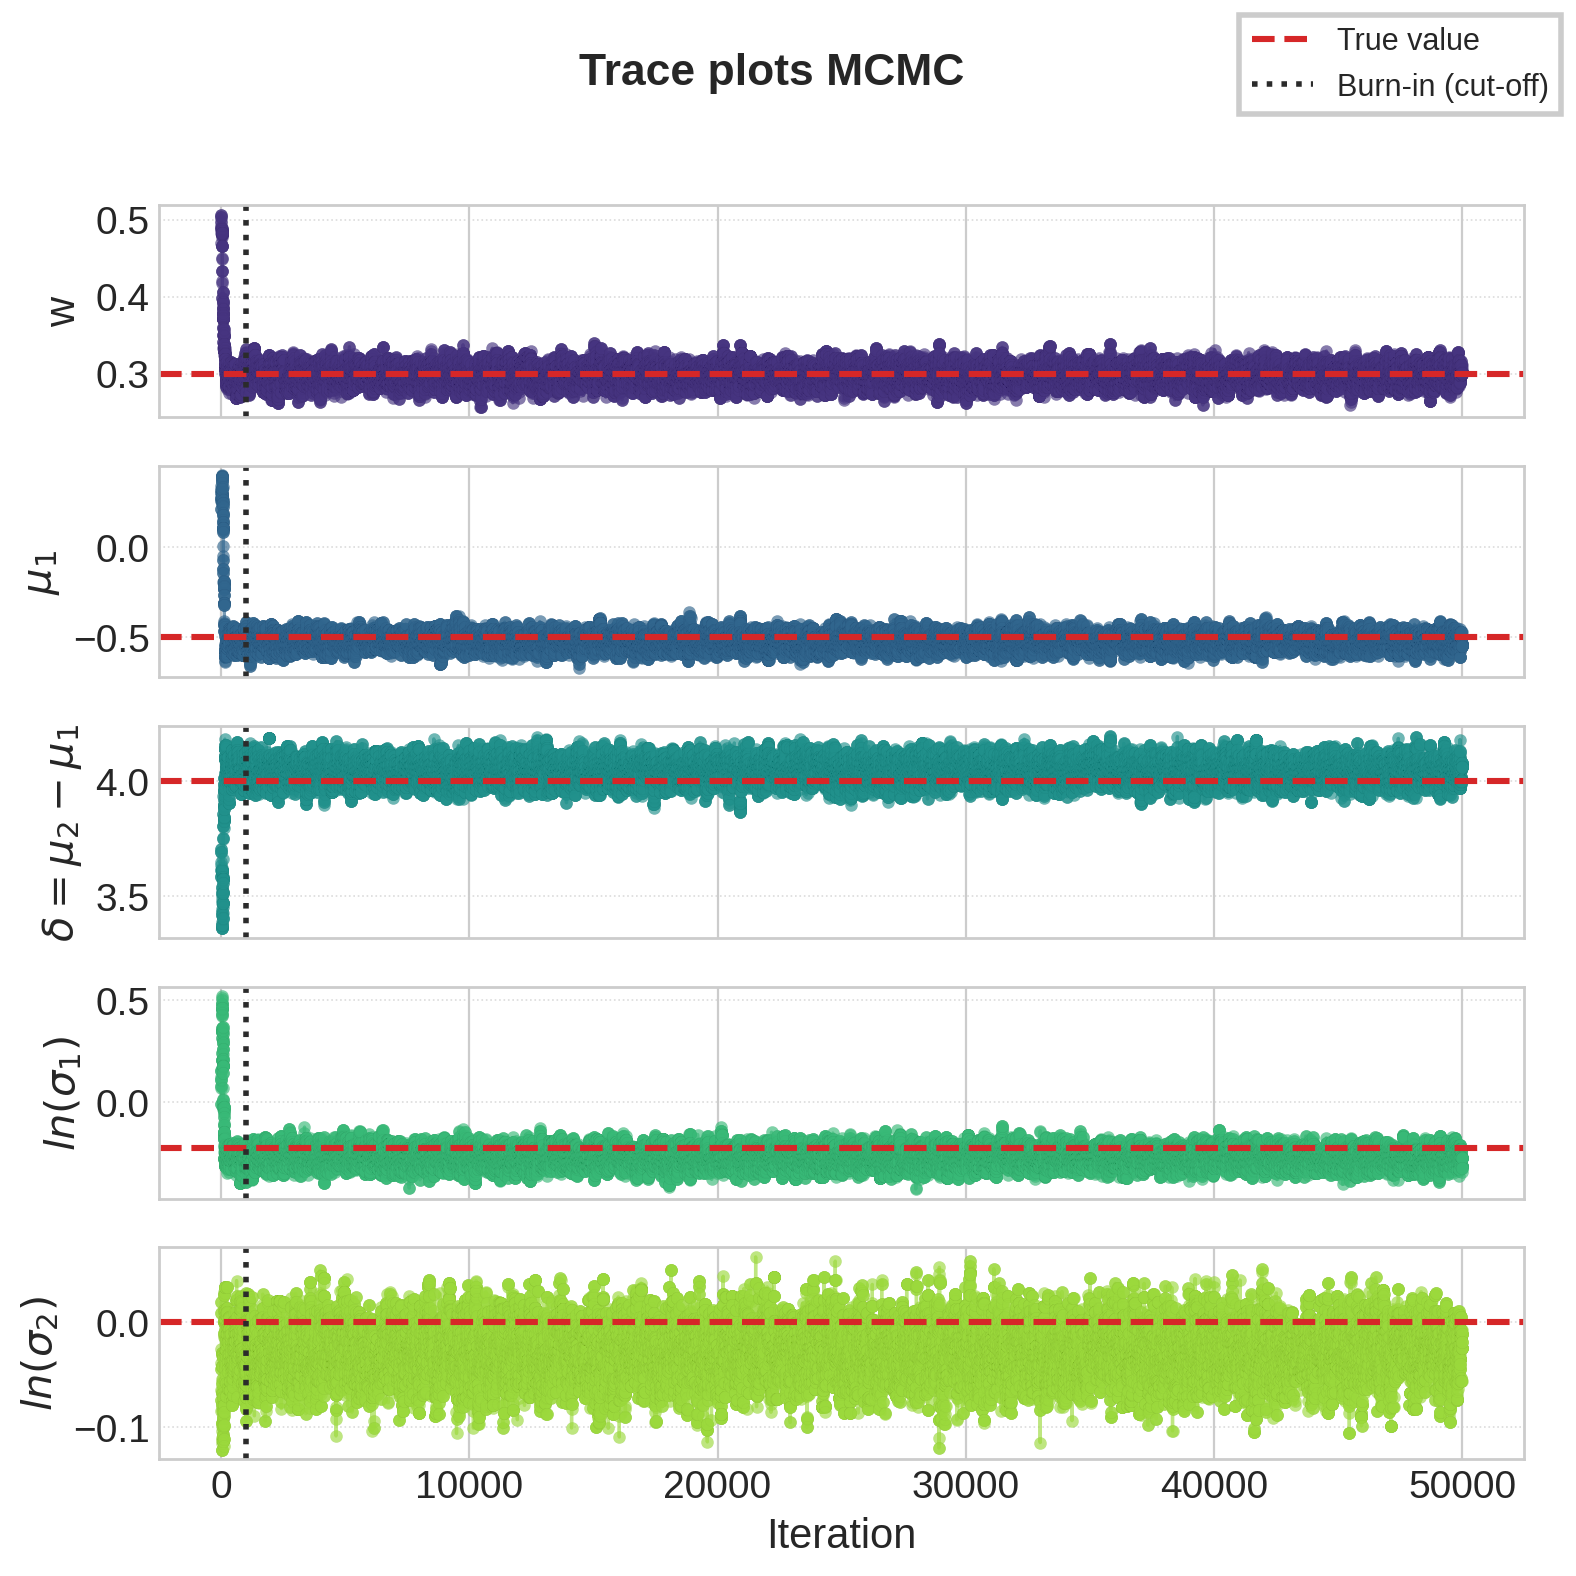

In [52]:
filename = 'trace_plot_mcmc_sigmaT90_cov'
fig, axes = plot_trace_mcmc(samples, filename, theta_sim, burnin=1000, outdir=outdir)

In [53]:
# burnin = 1000 #per valori simulati
burnin = 1000

samples_new = samples[burnin:,:]

In [54]:
cov_est = np.cov(samples_new, rowvar=False)
print('covarianza =\n', cov_est)

covarianza =
 [[ 1.17968293e-04  5.09751031e-05 -2.05103596e-05  5.92300049e-05
  -3.29123584e-05]
 [ 5.09751031e-05  1.38872575e-03 -1.20243508e-03  3.90995686e-04
  -1.71742001e-04]
 [-2.05103596e-05 -1.20243508e-03  1.86333317e-03 -1.88341172e-04
   5.27401275e-05]
 [ 5.92300049e-05  3.90995686e-04 -1.88341172e-04  1.48953818e-03
  -2.09080672e-04]
 [-3.29123584e-05 -1.71742001e-04  5.27401275e-05 -2.09080672e-04
   5.50133953e-04]]


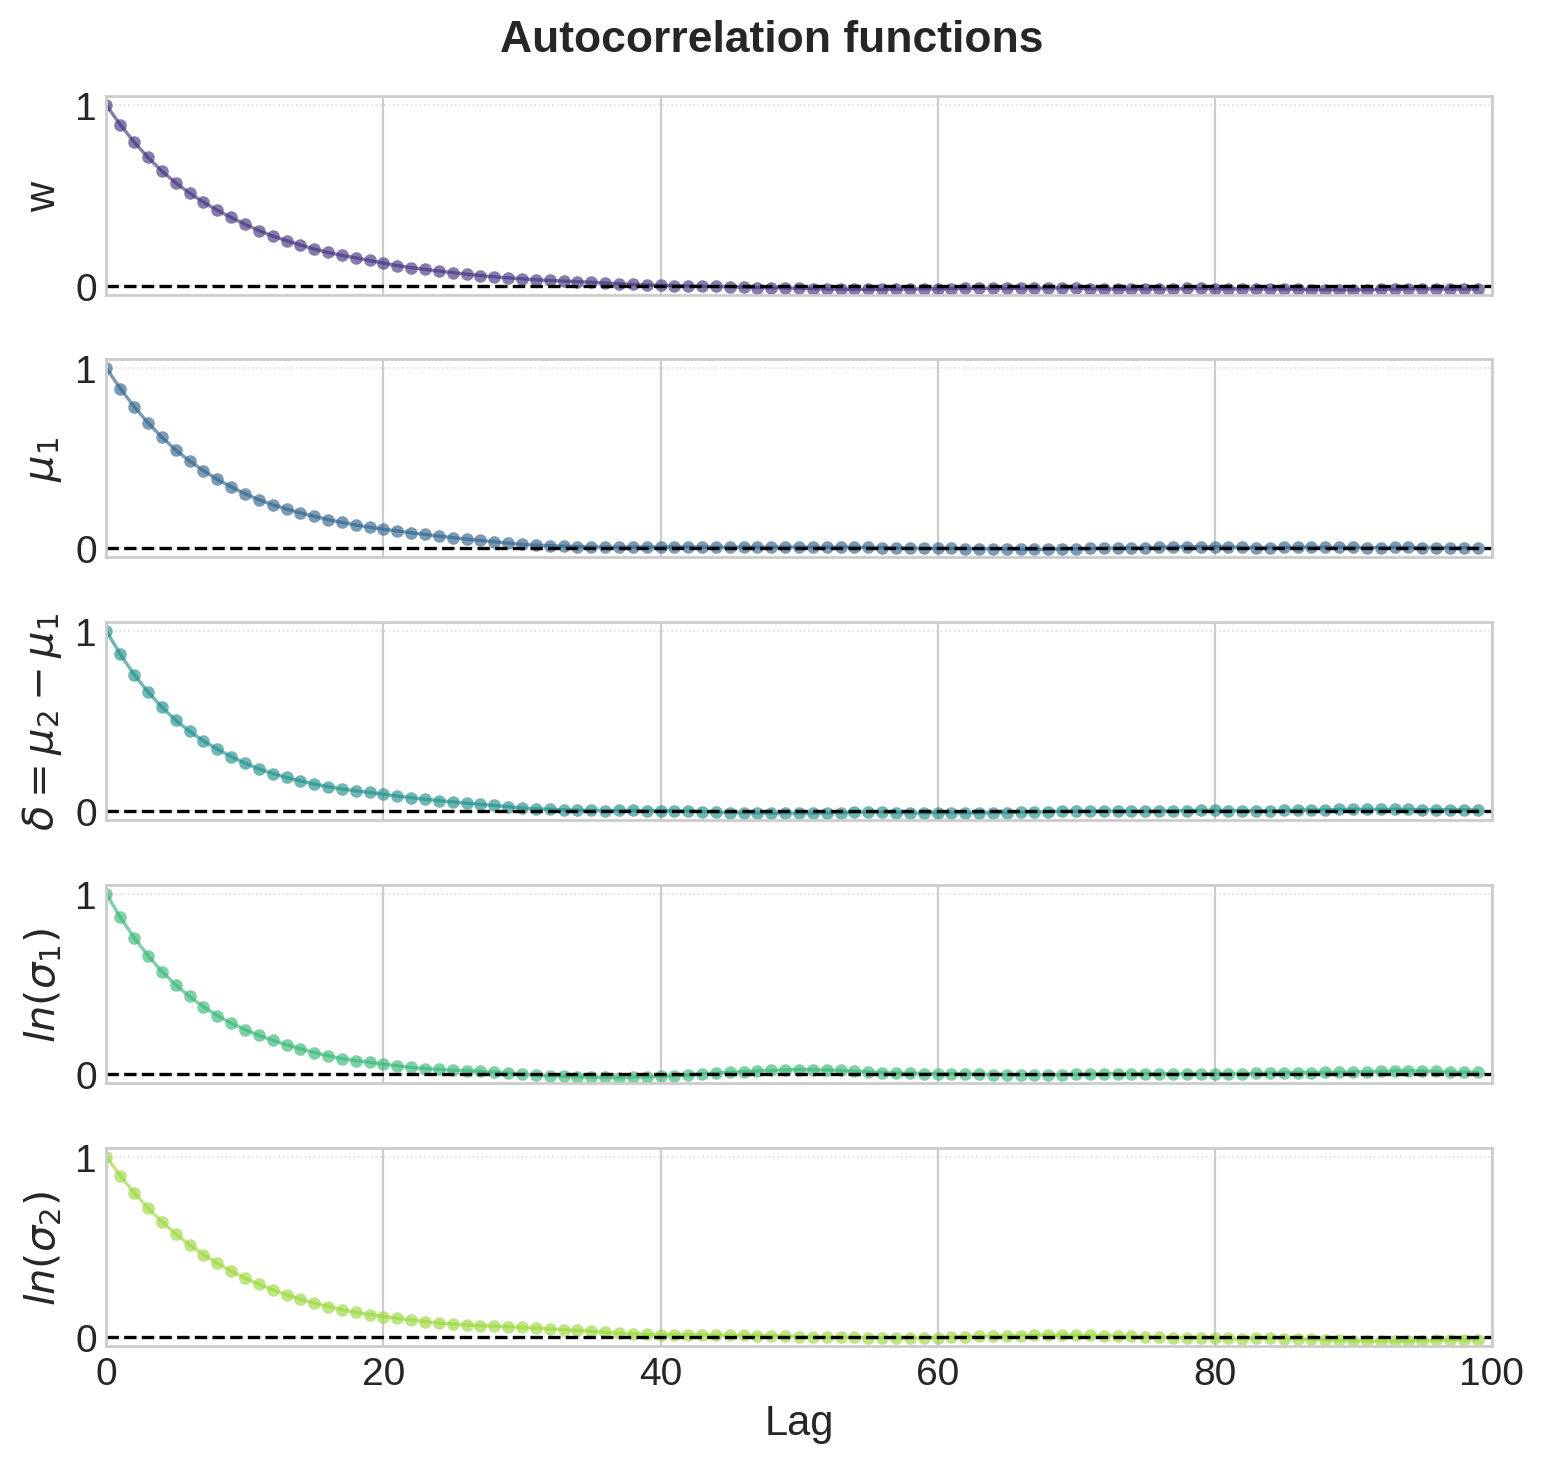

In [55]:
filename = 'autocorrelation_mcmc_sigmaT90_cov'
fig3, axes3 = plot_autocorrelations(samples_new, filename, max_lag=100, outdir=outdir)

In [56]:
for i, key in enumerate(theta_true.keys()):
    print(f'N_ESS ({key}) = {ess(samples_new[:,i]):.0f}')

N_ESS (w) = 2691
N_ESS (mu1) = 2866
N_ESS (mu2) = 3169
N_ESS (sigma1) = 3522
N_ESS (sigma2) = 2652


In [57]:
#thinning = 1000 #per valori simulati
# 25 cov (valori simulati)
thinning = 25
acf = []
for i in range(5):
    acf.append(autocorrelation(samples_new[:,i], norm=True))
    print(acf[i][thinning])
    
samples_new = samples_new[::thinning,:]

0.07186971316135715
0.060260553552266755
0.05254038196785701
0.022451986090255643
0.07238389692053476


In [58]:
samples_new.shape

(1960, 5)

/home/leo/Desktop/Bayesian_probability/codes/mcmc_plots.py:297: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(png_path, dpi=300, bbox_inches='tight', pad_inches=0.06)
/home/leo/Desktop/Bayesian_probability/codes/mcmc_plots.py:298: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(pdf_path, dpi=300, bbox_inches='tight', pad_inches=0.06)


Saved: ../figure/generated_data_sigmaT90/marginal_distribution_mcmc_sigmaT90_cov.png (PNG 300 dpi) and ../figure/generated_data_sigmaT90/marginal_distribution_mcmc_sigmaT90_cov.pdf (PDF)


/home/leo/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


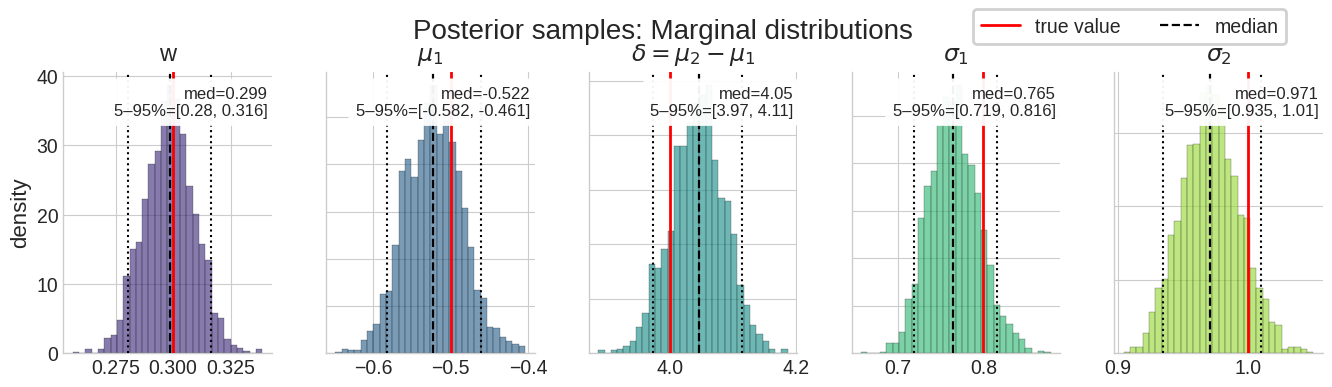

In [59]:
filename = 'marginal_distribution_mcmc_sigmaT90_cov'
fig2, axes2 = plot_marginal_distributions(samples_new, filename, theta_sim, outdir=outdir, sigma_scale='linear')

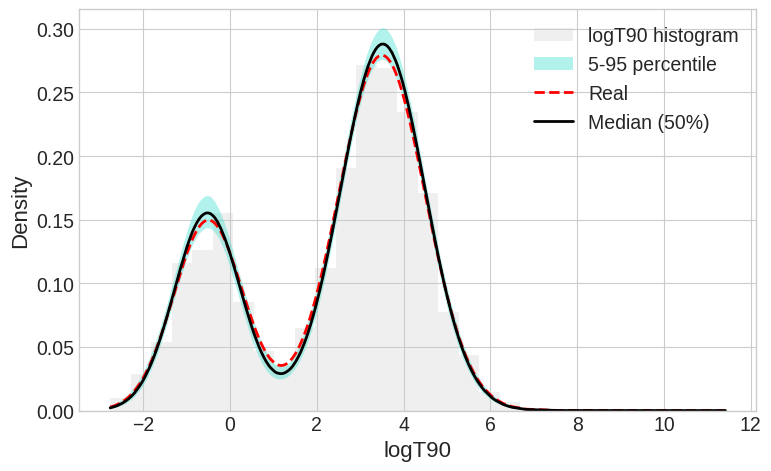

In [60]:
filename = 'distribution_mcmc_sigma_T90_cov'
fig4, axes4 = plot_distribution(logT90, samples_new, filename, theta_true=theta_sim, outdir=outdir)
#axes4.set_xlim(0,100)

In [61]:
# trasformazione
sigma1_samples = np.exp(samples_new[:,3])
sigma2_samples = np.exp(samples_new[:,4])

samples_transformed = samples_new.copy()
samples_transformed[:,3] = sigma1_samples
samples_transformed[:,4] = sigma2_samples

In [62]:
lns1, lns2 = samples_new[:,3:].T
w, mu1, delta, s1, s2 = samples_transformed.T
mu2 = mu1 + delta

scale1 = np.exp(mu1)
scale2 = np.exp(mu2)
mean1 = np.exp(mu1 + 0.5 * s1**2)
mean2 = np.exp(mu2 + 0.5 * s2**2)
sd1 = np.sqrt((np.exp(s1**2)-1) * np.exp(2*mu1 + s1**2))
sd2 = np.sqrt((np.exp(s2**2)-1) * np.exp(2*mu2 + s2**2))

def pctls(a):
    p = np.percentile(a, [5,16,50,84,95])
    mean  = np.mean(a)
    sigma = np.std(a, ddof=1)
    # median, +err, -err, +err90, -err90, sigma, mean
    return p[2], p[3]-p[2], p[2]-p[1], p[4]-p[2], p[2]-p[0], sigma, mean  

print("Parametri mcmc:")
for name, param in [('w',w),('mu1',mu1),('delta',delta),('mu2',mu2),
                    ('lns1', lns1),('lns2', lns2),('s1',s1),('s2',s2)]:
    med, up68, down68, up90, down90, sigma, mean = pctls(param)
    print(f"{name}: {med:.3f} +{up68:.3f} -{down68:.3f}  ({mean:.3f}±{sigma:.3f})    [{med-down90:.3f}, {med+up90:.3f}]  (90%)")

print("\nParametri in secondi:")
for name, param in [('median1',scale1),('median2',scale2),('mean1',mean1),('mean2',mean2),('sd1',sd1),('sd2',sd2)]:
    med, up68, down68, up90, down90, sigma, mean = pctls(param)
    print(f"{name}: {med:.3f} +{up68:.3f} -{down68:.3f} s  ({mean:.3f}±{sigma:.3f})   [{med-down90:.3f}, {med+up90:.3f}] s (90%)")

Parametri mcmc:
w: 0.299 +0.011 -0.011  (0.298±0.011)    [0.280, 0.316]  (90%)
mu1: -0.522 +0.037 -0.038  (-0.522±0.037)    [-0.582, -0.461]  (90%)
delta: 4.046 +0.042 -0.043  (4.045±0.043)    [3.973, 4.114]  (90%)
mu2: 3.523 +0.028 -0.030  (3.522±0.029)    [3.474, 3.570]  (90%)
lns1: -0.268 +0.038 -0.038  (-0.268±0.038)    [-0.330, -0.203]  (90%)
lns2: -0.029 +0.024 -0.023  (-0.029±0.023)    [-0.068, 0.010]  (90%)
s1: 0.765 +0.030 -0.029  (0.766±0.030)    [0.719, 0.816]  (90%)
s2: 0.971 +0.023 -0.022  (0.972±0.023)    [0.935, 1.011]  (90%)

Parametri in secondi:
median1: 0.593 +0.022 -0.022 s  (0.594±0.022)   [0.559, 0.631] s (90%)
median2: 33.879 +0.976 -0.987 s  (33.882±0.975)   [32.270, 35.504] s (90%)
mean1: 0.794 +0.042 -0.035 s  (0.797±0.039)   [0.738, 0.865] s (90%)
mean2: 54.300 +1.796 -1.722 s  (54.346±1.789)   [51.527, 57.388] s (90%)
sd1: 0.708 +0.071 -0.059 s  (0.713±0.066)   [0.617, 0.825] s (90%)
sd2: 67.949 +4.111 -3.785 s  (68.194±4.112)   [61.792, 75.404] s (90%)


## Real Data - sigma_logT90

In [70]:
LOAD = 0
outdir = '../figure/real_data_sigmaT90'

rng = np.random.default_rng(1234)

logT90       = arr[:,0]
sigma_logT90 = arr[:,1]


# define the prior bounds
bounds = [
    [0.0, 1.0],     # w
    [-4, 7],        # mu1 (ln s)
    [0.0, 10.0],    # delta = mu2 - mu1
    [np.log(0.1), np.log(6.0)],    # ln(sigma1) 
    [np.log(0.1), np.log(6.0)]     # ln(sigma2)
]

# run the mh sampler
n_steps  = 50000

covariance = np.array(
    ([ 0.00035431,  0.0018177,  -0.00129226,  0.00081391, -0.00039666],
     [ 0.0018177,   0.01617827, -0.01265535,  0.00607794, -0.00251953],
     [-0.00129226, -0.01265535,  0.01099872, -0.00445123,  0.00160026],
     [ 0.00081391,  0.00607794, -0.00445123,  0.0039254,  -0.00114485],
     [-0.00039666, -0.00251953,  0.00160026, -0.00114485,  0.00108923]))

if LOAD == 0:
    theta0  = init_theta_from_data(logT90, bounds)
    samples = metropolis_hastings(theta0, logT90, bounds, init_cov=covariance, 
                                  rng = rng, sigma_logT90 = sigma_logT90, n = n_steps)
    np.savetxt('../chains/chain_real_sigmaT90.txt',samples)
else:
    samples = np.loadtxt('../chains/chain_real_sigmaT90.txt')

iteration 0: acceptance 1.0
iteration 2500: acceptance 0.3154738104758097
iteration 5000: acceptance 0.3117376524695061
iteration 7500: acceptance 0.3134248766831089
iteration 10000: acceptance 0.31326867313268675
iteration 12500: acceptance 0.3175745940324774
iteration 15000: acceptance 0.3201786547563496
iteration 17500: acceptance 0.31843894634592307
iteration 20000: acceptance 0.31893405329733515
iteration 22500: acceptance 0.3183858495177992
iteration 25000: acceptance 0.31794728210871565
iteration 27500: acceptance 0.3176611759572379
iteration 30000: acceptance 0.317789407019766
iteration 32500: acceptance 0.31765176456109045
iteration 35000: acceptance 0.31927659209736864
iteration 37500: acceptance 0.3200181328497907
iteration 40000: acceptance 0.3183170420739482
iteration 42500: acceptance 0.3186042681348674
iteration 45000: acceptance 0.31997066731850404
iteration 47500: acceptance 0.32016168080671986
Metropolis finished. Acceptance rate = 0.3196


Saved: ../figure/real_data_sigmaT90/trace_plot_mcmc_real_sigmaT90_cov.png (PNG 300 dpi) and ../figure/real_data_sigmaT90/trace_plot_mcmc_real_sigmaT90_cov.pdf (PDF)


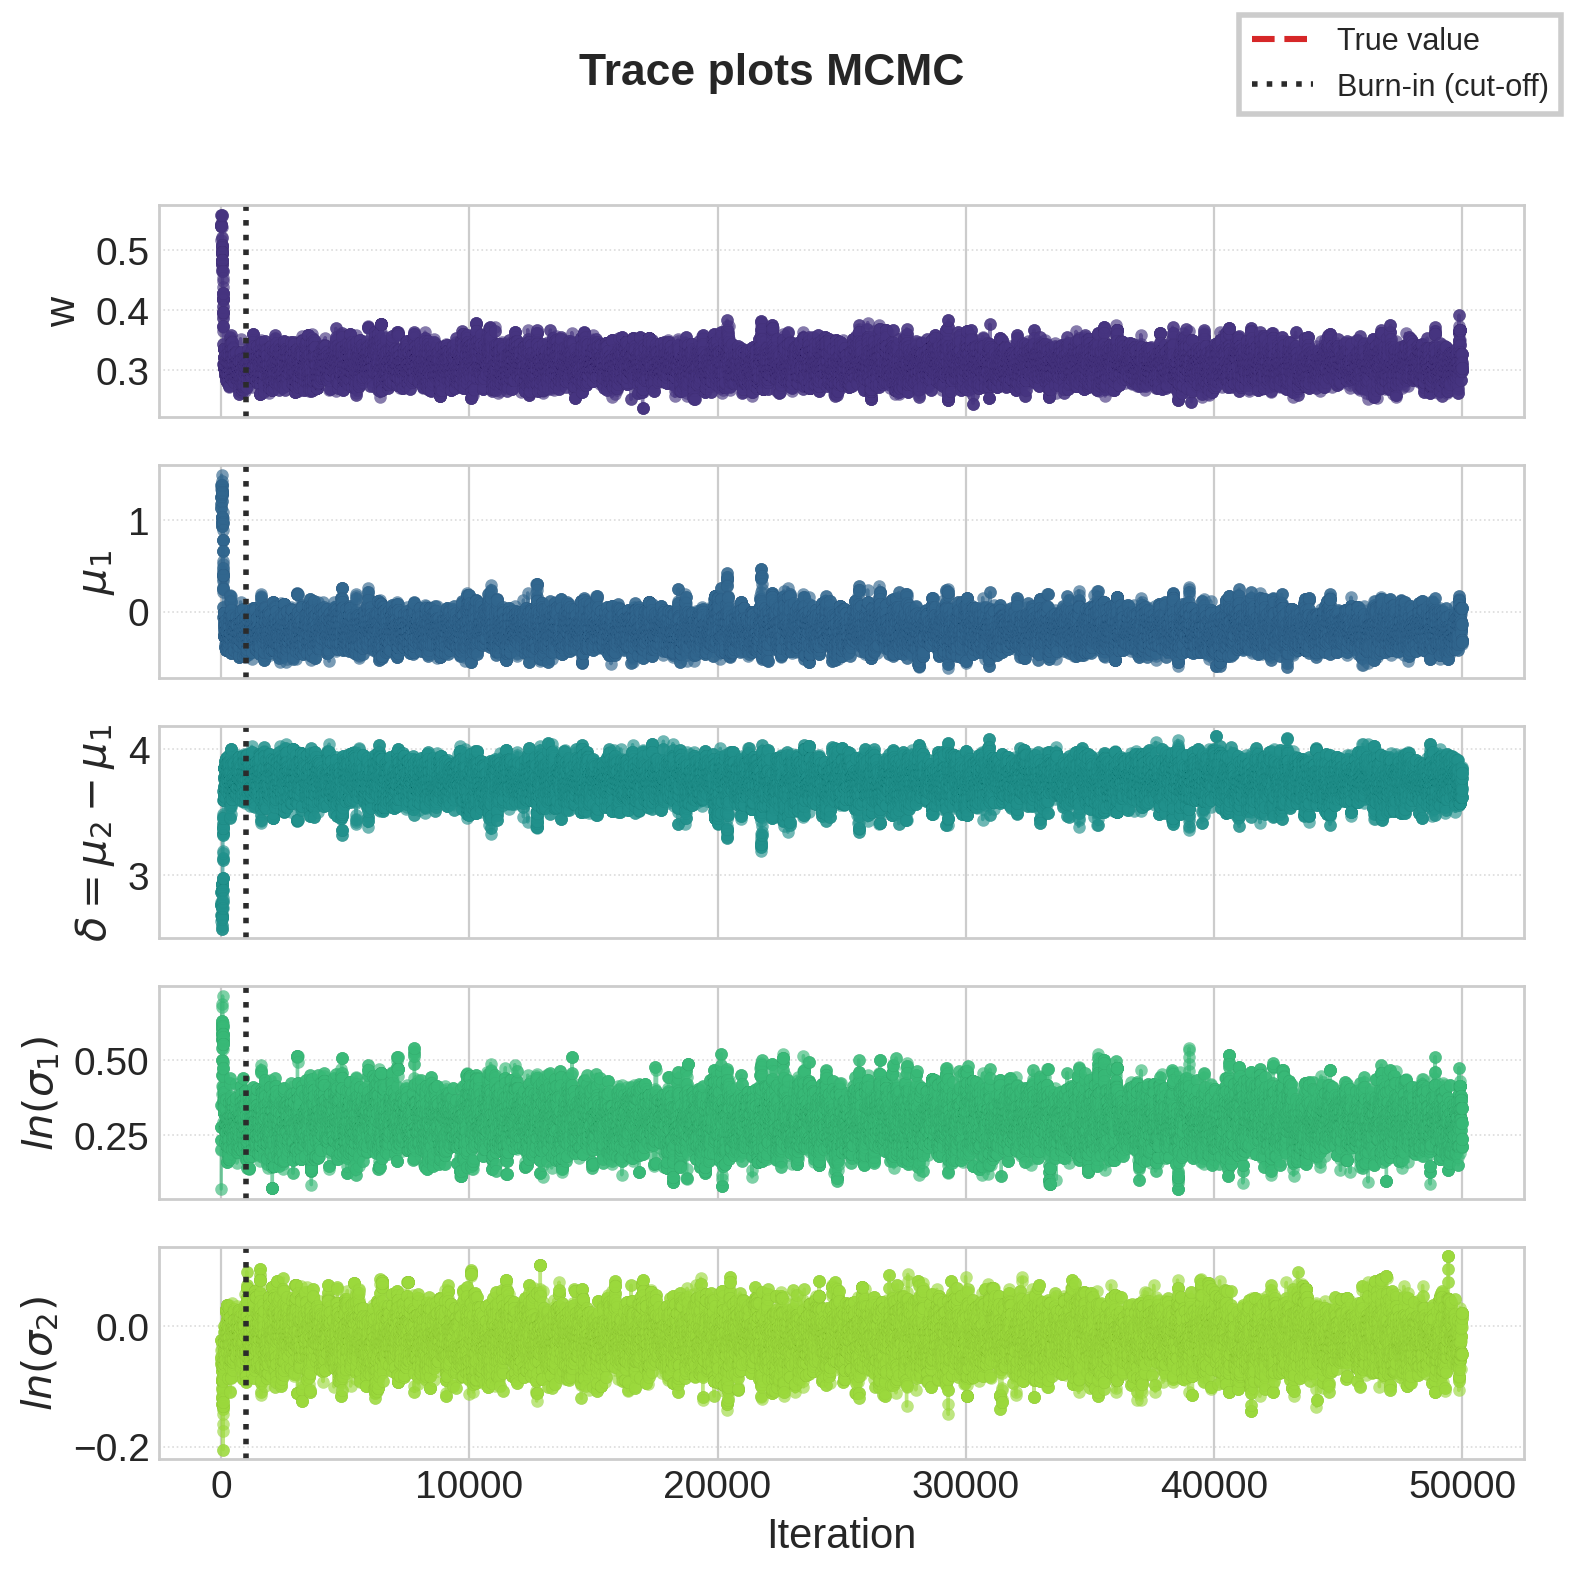

In [71]:
filename = 'trace_plot_mcmc_real_sigmaT90_cov'
fig, axes = plot_trace_mcmc(samples, filename, burnin=1000, outdir=outdir)

In [72]:
burnin = 1000

samples_new = samples[burnin:,:]

In [73]:
cov_est = np.cov(samples_new, rowvar=False)
print('covarianza =\n', cov_est)

covarianza =
 [[ 0.00036025  0.00176245 -0.00119816  0.0008123  -0.00038395]
 [ 0.00176245  0.01627448 -0.01237537  0.00592718 -0.00263183]
 [-0.00119816 -0.01237537  0.01055325 -0.00420215  0.00168536]
 [ 0.0008123   0.00592718 -0.00420215  0.0039228  -0.00110696]
 [-0.00038395 -0.00263183  0.00168536 -0.00110696  0.00108809]]


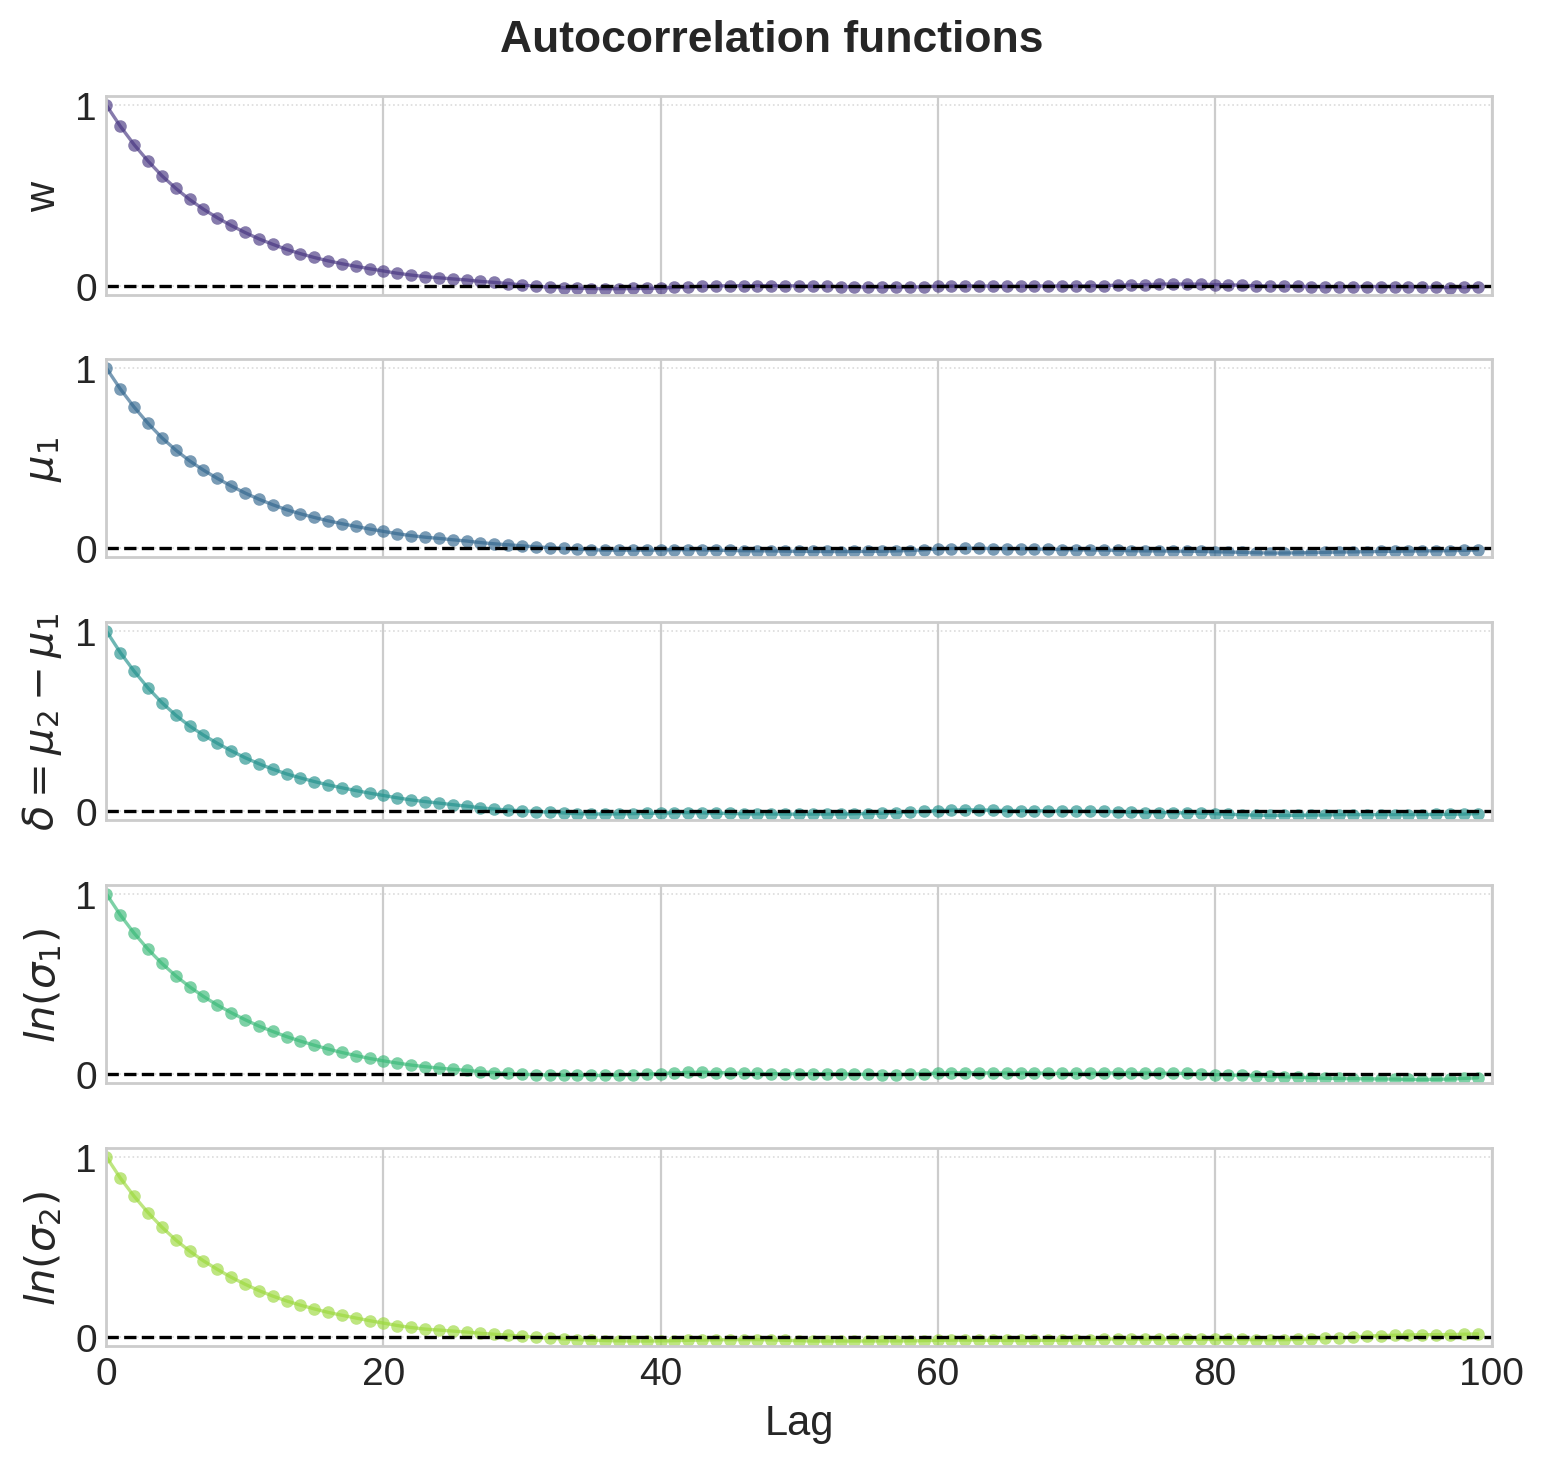

In [74]:
filename = 'autocorrelation_mcmc_real_sigmaT90_cov'
fig3, axes3 = plot_autocorrelations(samples_new, filename, max_lag=100, outdir=outdir)

In [75]:
thinning = 25
acf = []
for i in range(5):
    acf.append(autocorrelation(samples_new[:,i], norm=True))
    print(acf[i][thinning])
    
samples_new = samples_new[::thinning,:]

0.03699696084329575
0.04819128438965975
0.03711018170126117
0.02761761629971693
0.03409113765236241


In [76]:
samples_new.shape

(1960, 5)

/home/leo/Desktop/Bayesian_probability/codes/mcmc_plots.py:297: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(png_path, dpi=300, bbox_inches='tight', pad_inches=0.06)
/home/leo/Desktop/Bayesian_probability/codes/mcmc_plots.py:298: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(pdf_path, dpi=300, bbox_inches='tight', pad_inches=0.06)


Saved: ../figure/real_data_sigmaT90/marginal_distribution_mcmc_real_sigmaT90_cov.png (PNG 300 dpi) and ../figure/real_data_sigmaT90/marginal_distribution_mcmc_real_sigmaT90_cov.pdf (PDF)


/home/leo/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


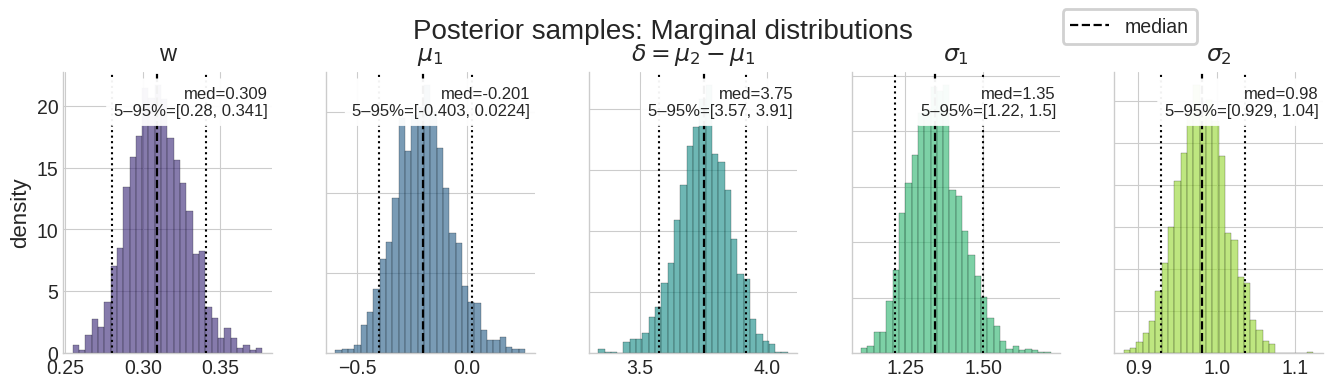

In [77]:
filename = 'marginal_distribution_mcmc_real_sigmaT90_cov'
fig2, axes2 = plot_marginal_distributions(samples_new, filename, outdir=outdir, sigma_scale='linear')

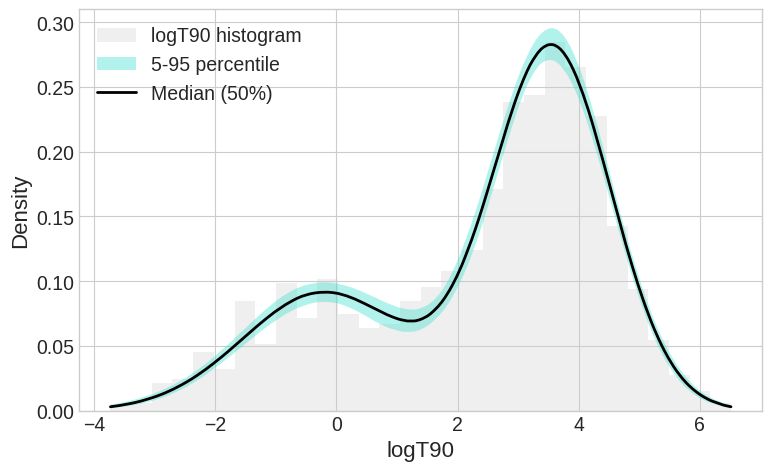

In [78]:
filename = 'distribution_mcmc_real_sigmaT90_cov'
fig4, axes4 = plot_distribution(logT90, samples_new, filename, outdir=outdir)

In [79]:
# trasformazione
sigma1_samples = np.exp(samples_new[:,3])
sigma2_samples = np.exp(samples_new[:,4])

samples_transformed = samples_new.copy()
samples_transformed[:,3] = sigma1_samples
samples_transformed[:,4] = sigma2_samples

In [80]:
lns1, lns2 = samples_new[:,3:].T
w, mu1, delta, s1, s2 = samples_transformed.T
mu2 = mu1 + delta

scale1 = np.exp(mu1)
scale2 = np.exp(mu2)
mean1 = np.exp(mu1 + 0.5 * s1**2)
mean2 = np.exp(mu2 + 0.5 * s2**2)
sd1 = np.sqrt((np.exp(s1**2)-1) * np.exp(2*mu1 + s1**2))
sd2 = np.sqrt((np.exp(s2**2)-1) * np.exp(2*mu2 + s2**2))

def pctls(a):
    p = np.percentile(a, [5,16,50,84,95])
    mean  = np.mean(a)
    sigma = np.std(a, ddof=1)
    # median, +err, -err, +err90, -err90, sigma, mean
    return p[2], p[3]-p[2], p[2]-p[1], p[4]-p[2], p[2]-p[0], sigma, mean  

print("Parametri mcmc:")
for name, param in [('w',w),('mu1',mu1),('delta',delta),('mu2',mu2),
                    ('lns1', lns1),('lns2', lns2),('s1',s1),('s2',s2)]:
    med, up68, down68, up90, down90, sigma, mean = pctls(param)
    print(f"{name}: {med:.3f} +{up68:.3f} -{down68:.3f}  ({mean:.3f}±{sigma:.3f})    [{med-down90:.3f}, {med+up90:.3f}]  (90%)")

print("\nParametri in secondi:")
for name, param in [('median1',scale1),('median2',scale2),('mean1',mean1),('mean2',mean2),('sd1',sd1),('sd2',sd2)]:
    med, up68, down68, up90, down90, sigma, mean = pctls(param)
    print(f"{name}: {med:.3f} +{up68:.3f} -{down68:.3f} s  ({mean:.3f}±{sigma:.3f})   [{med-down90:.3f}, {med+up90:.3f}] s (90%)")

Parametri mcmc:
w: 0.309 +0.019 -0.018  (0.310±0.019)    [0.280, 0.341]  (90%)
mu1: -0.201 +0.125 -0.124  (-0.199±0.129)    [-0.403, 0.022]  (90%)
delta: 3.751 +0.098 -0.102  (3.749±0.103)    [3.574, 3.915]  (90%)
mu2: 3.550 +0.045 -0.045  (3.550±0.046)    [3.474, 3.625]  (90%)
lns1: 0.297 +0.063 -0.062  (0.298±0.063)    [0.198, 0.404]  (90%)
lns2: -0.020 +0.032 -0.032  (-0.020±0.033)    [-0.073, 0.036]  (90%)
s1: 1.345 +0.088 -0.081  (1.349±0.086)    [1.219, 1.497]  (90%)
s2: 0.980 +0.032 -0.031  (0.981±0.032)    [0.929, 1.036]  (90%)

Parametri in secondi:
median1: 0.818 +0.109 -0.095 s  (0.827±0.109)   [0.669, 1.023] s (90%)
median2: 34.808 +1.611 -1.547 s  (34.838±1.603)   [32.269, 37.512] s (90%)
mean1: 2.023 +0.510 -0.393 s  (2.101±0.519)   [1.441, 3.066] s (90%)
mean2: 56.380 +1.973 -2.062 s  (56.383±2.045)   [53.135, 59.762] s (90%)
sd1: 4.561 +2.041 -1.297 s  (4.992±2.076)   [2.721, 8.823] s (90%)
sd2: 71.738 +4.807 -4.654 s  (71.826±4.666)   [64.522, 79.815] s (90%)
